# Week 12 Model Fitting


In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Assume you have this dataset:

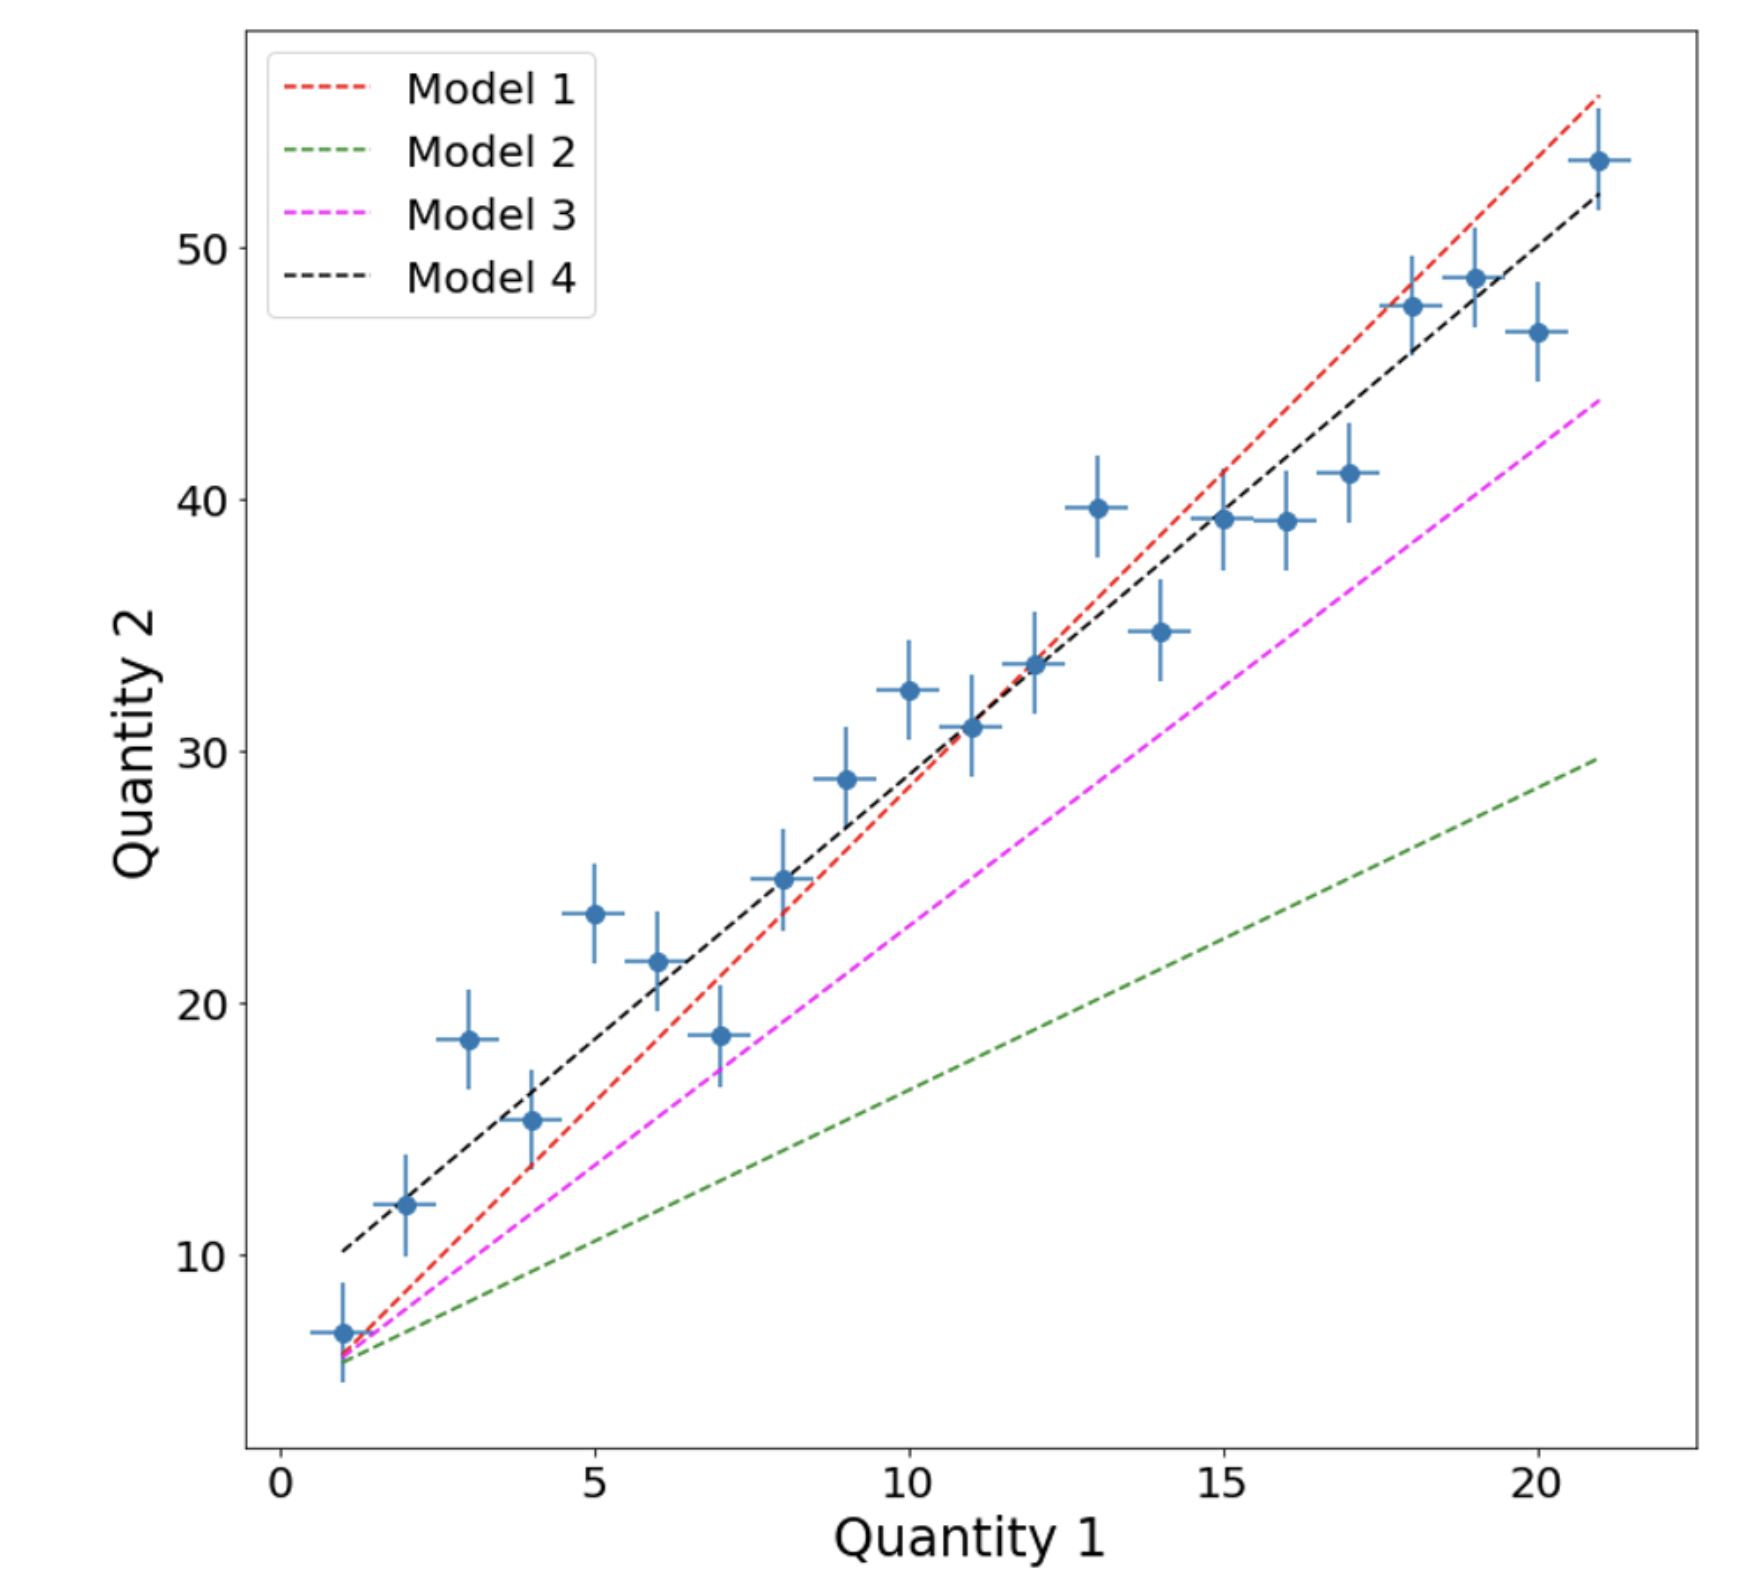

You know that the data should follow an equation of the form:

$y = a \cdot x +b$ 

but, how do you find the values of $a$ and $b$? Which is the *best* line above?


### We need a way to *quantify* what "best-fit" model means.

 $\Sigma_i  \frac{(O_i - E_i )^2}{E_i}$ 

 where, $O_i$ is our data and $E_i$ the expected model points

$\rightarrow$ we minimize the sum of the squares of the offsets ("aka residuals, $R$") of the points from the curve; The smaller $\Sigma R^2$  is, the better the  model fits the data!

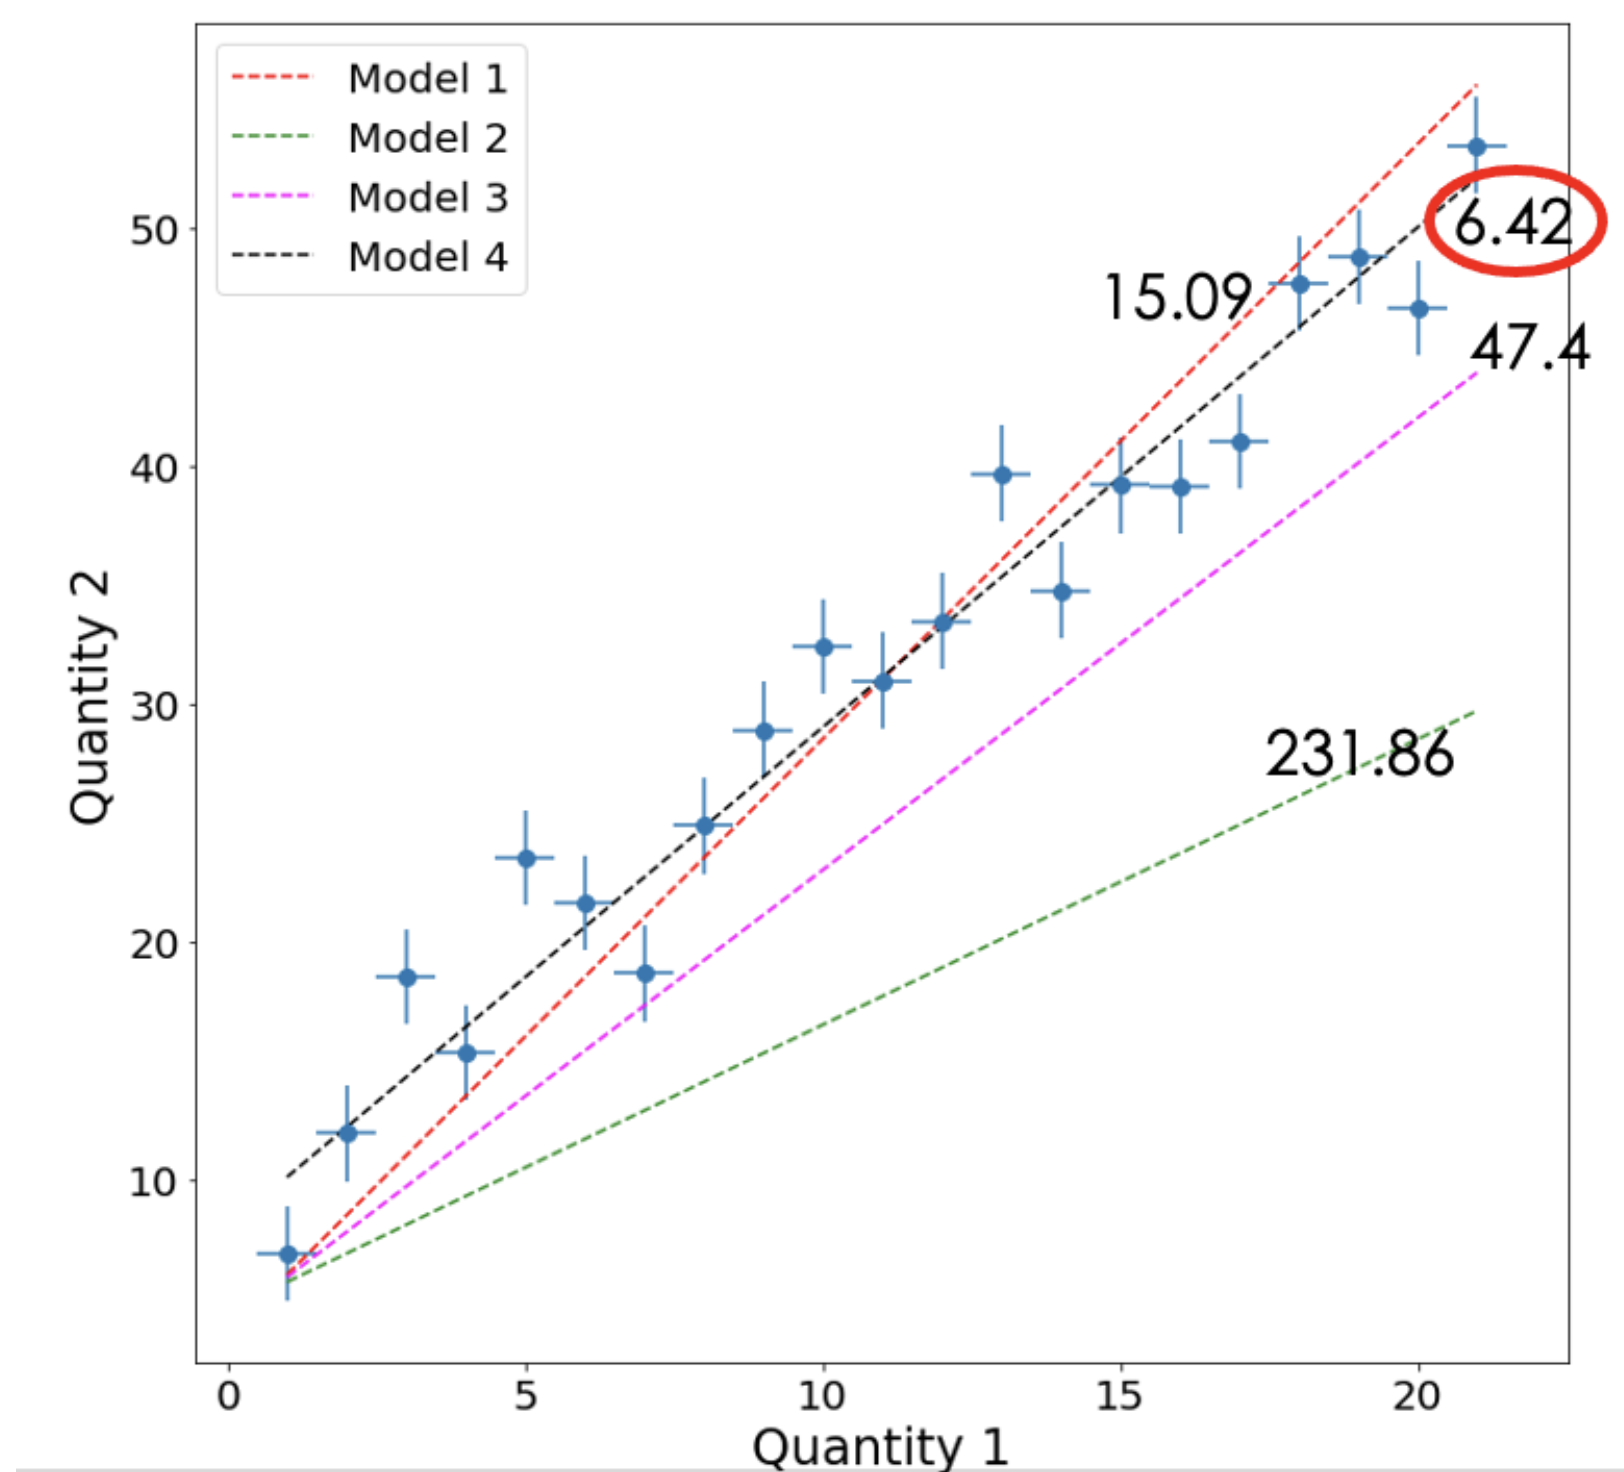

So far we ignored that our data can have error bars. Assuming that the data/measurements are independent of each other and that they are normally distributed, if  $y_i$ with mean $\mu_i$ and variance $\sigma^2_i$, we can define $\chi^2$ as :

 $\chi^2 = \Sigma \frac{(y_i - \mu_i)^2}{\sigma^2_i}$

- Note that the error we fit is in the y dimension; we assume that the mean x position is accurate. If $y$ data follow a Gaussian (i.e., normal) distribution this process is the chi-square minimization and is the same as least squares regression.

- The premise of the $\chi^2$ test is that the deviations from the model are due to statistical fluctuations due to our limited numbers of observations per bin, i.e. we deal with "noise" or statistical errors.

- Recall that the probability density for the normal distribution is:

  $f(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \, e^{-\frac{1}{2}\frac{(x - \mu)^2}{ \sigma^2}}$

- Notice the exponentiated term. You can see that by *minimizing* $\chi^2$ the values of $\mu_i$ are the $y$ values for the function or line and that the $y_i$ are *each* assumed to be sampled from a normal distribution with mean $\mu_i$ and standard deviation $\sigma_i$!  



### BUT:

The more points you fit, the *larger* your *minimum* $\chi^2$. Also, the more *free* parameters (imagine fitting a high-order polynomial instead of a line) the *smaller* your *minimum* $\chi^2$ will be.

### How can we compare between models and data sets with different numbers of points?

- Degrees of freedom (DOF) : 

    $n_{\mathrm{DOF}} = N_{\mathrm{data~points}} – ~(N_{\mathrm{fitted~parameters}} - 1)$

- **USE** the *Reduced* $\chi^2$:

    $\chi^2_{\mathrm{Reduced}} = \frac{\chi^2}{n_{\mathrm{DOF}}} $

- *Reduced* $\chi^2$ should be of order of magnitude 1, for a *good* fit, much much larger than one for a *bad* fit, and much much *less* than 1 if you have *over-estimated* your errorbars, $\sigma_i$.


Most General form:

 $\chi ^2 = \Sigma w_i  (y_i - f_i)^2 $

where weight $w_i$ can be:

- $\frac{1}{\sigma_i}$ 

- $\frac{1}{f_i}$ 

**WARNING!** If observations are *correlated* we need to calculate the ‘covariance matrix’


### Let's do some fitting of our own now:

### We observed this data:

In [2]:
x = np.arange(1,22,1)
y = np.array([ 6.89632026, 11.93880672 ,18.51618226, 15.32061411, 23.5375446,  21.62910794,
 18.6627083,  24.86024463, 28.89751315, 32.41984013, 30.96236269, 33.45884498,
 39.66476063, 34.761296,   39.17902872, 39.13987917, 41.04070812, 47.65140802,
 48.76335871, 46.62044392, 53.46507287])

### Let's visualize it first:

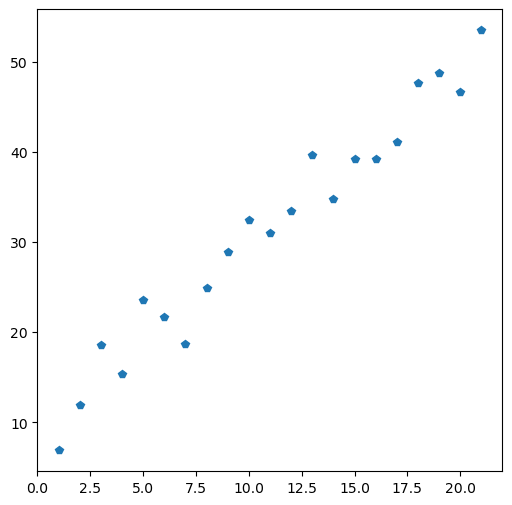

In [3]:
plt.figure( figsize = (6,6) )
plt.plot( x, y, marker = 'p', linestyle = 'none')

### what do you think is the underlying model for these data?

### make a model of the form y_theoretical = ax + b 
### then scan different values of a $\in [0.1, 8) $ and b $\in [0.1, 10) $ ; calculate the ( (y-ytheory)**2/y_theory) and find the minimum. 


In [10]:
a = np.linspace( 0.1, 50, 1000 )
b = np.linspace( 0.1, 50 , 1000 ) 

In [11]:
r_square = np.zeros( ( len( a ), len( b ) ) )

for i in range( len( a ) ):
    for j in range( len( b ) ):
        y_theory           = a[ i ] * x  + b[ j ]
        r_square[ i, j ] = np.sum( ( y - y_theory )**2  )


In [12]:
## which is our min?
print(np.min(r_square))

##where is it?
print( a[ np.where( r_square == np.min( r_square ) )[ 0 ] ], 
       b[ np.where( r_square == np.min( r_square ) )[ 1 ] ] ) 

141.12250256882538
[2.04804805] [8.79129129]


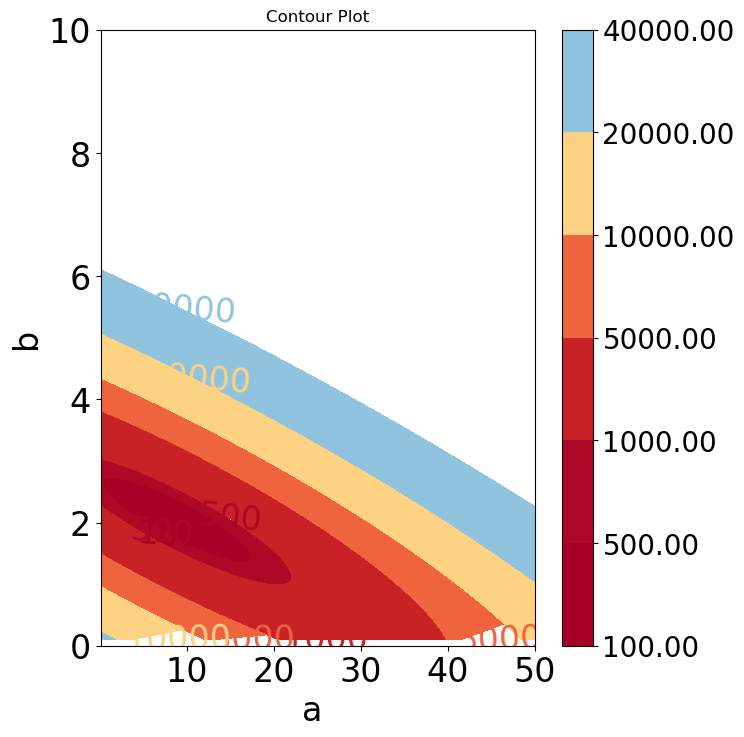

In [14]:
### let's see how large the change of our chi^2 is:

fig, ax = plt.subplots(1, 1,figsize=(7,8))
cp = plt.contourf(b, a, r_square,levels = [100, 500,1000, 5000, 10000, 20000,40000],cmap='RdYlBu')
plt.clabel(cp, inline=True, 
          fontsize=24)
plt.title('Contour Plot')
plt.xlabel('a ',fontsize=24)
plt.ylabel('b',fontsize=24)
plt.xticks(fontsize=24)
plt.yticks(fontsize=24)
plt.ylim(0,10)
cbar = fig.colorbar(cp, format='%5.2f')
cbar.ax.tick_params(labelsize=20)

In [8]:
#use the minimum value to plot your data:
#-------------------------------------------------------

# find where chi_square is minimum:
q  = np.where( r_square == np.min( r_square ) )

print(q , a[ q[0] ], b[ q[ 1 ]] )

# get the correct model for that minimum:
y2 = a[ q[0] ] * x + b[ q[ 1 ] ]


(array([10]), array([80])) [2.11010101] [8.1]


Text(0, 0.5, 'Quantity 2')

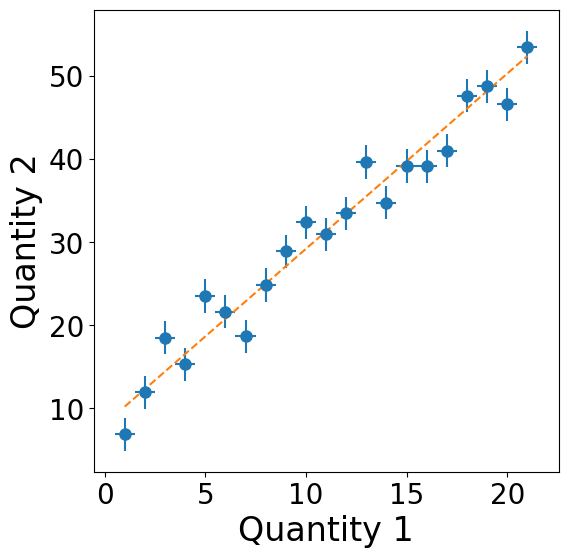

In [9]:


# make the plot:
plt.figure( figsize = ( 6, 6 ) )

# plot your data:
plt.errorbar( x, y, yerr = 2., xerr = 0.5,linestyle='none', marker='o', markersize = 8 )
# overplot your minimum chi_square model:
plt.plot( x, y2,linestyle = '--' )


plt.xticks( fontsize = 20 )
plt.yticks( fontsize = 20 )
plt.xlabel('Quantity 1', fontsize = 24 )
plt.ylabel('Quantity 2', fontsize = 24 ) 


### let's do the same but now using the $\chi^2$ ( (y-y_theory)**2/sigma**2) and find the minimum; assume $\sigma = 5$.


In [15]:

a = np.arange(0.1, 8 , 0.01)
b = np.arange(0.1, 10 , 0.01)

chi_square = np.zeros( ( len( a ), len( b ) ) )

sigma = 2

for i in range( len( a ) ):
    for j in range( len( b ) ):
        y_theory           = a[ i ] * x  + b[ j ]
        chi_square[ i, j ] = np.sum( ( y - y_theory )**2 / sigma**2 )


In [17]:
print("Reduced chi-squared:",np.min(chi_square)/(len(x)-1),"DOF",len(x) - 1)

Reduced chi-squared: 1.7637960584610486 DOF 20


Text(0, 0.5, 'Quantity 2')

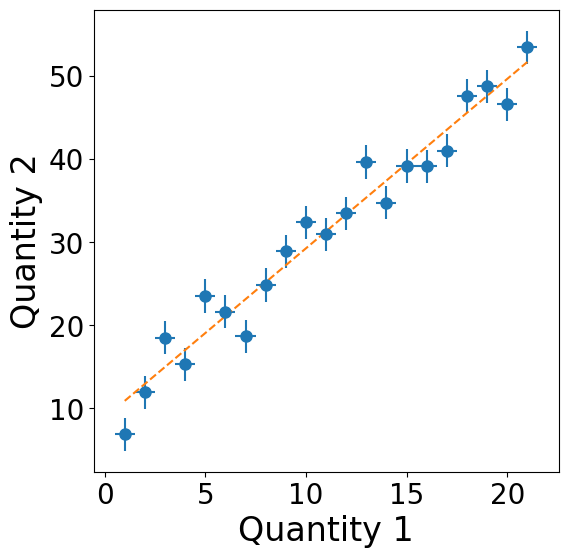

In [18]:

#use the minimum value to plot your data:
q  = np.where( chi_square == np.min( chi_square ) )
y2 = a[ q[ 0 ] ]*x + b[ q[ 1 ] ]


# make the plot:
plt.figure(figsize=(6,6))

plt.errorbar(x, y, yerr=sigma, xerr=0.5,linestyle='none', marker='o', markersize = 8)
plt.plot(x,y2,linestyle='--')


plt.xticks(fontsize =20)
plt.yticks(fontsize = 20)
plt.xlabel('Quantity 1', fontsize = 24)
plt.ylabel('Quantity 2', fontsize = 24)


### You will be pleased to know that Python has --of course-- done the work before you, for you....Enter Scipy ( https://www.scipy.org/ ) and its stats package ( https://docs.scipy.org/doc/scipy/reference/stats.html )

### Scipy has packages that do data fitting for you:

- least_squares
- curve_fit
- chisquare


In [21]:
from scipy.stats import chisquare

In [22]:
#make a dataset:
a1 = np.array( [ 16, 18, 16, 14, 12, 12 ] )  
a2 = np.array( [ 16, 16, 16, 16, 16, 8 ] )

In [24]:
# call chisquare with y_observations, y_expected_from_model
a = chisquare( a1, f_exp = a2  )    

In [25]:
print( a )

Power_divergenceResult(statistic=3.5, pvalue=0.6233876277495822)


In [ ]:
## returns chi-squared test statistic and p-value of the test (here you see it is very likely that our 
## data would have been observed )

### We observed a target moving at times t and has a displacement s:


In [63]:
t = np.arange(1,22,2)
s = [ 11.80487185,  46.07654076 , 57.27329417 , 94.31029188, 146.48665845,
 185.33660777, 236.5500788,  318.94164082, 388.45874659, 475.7783416,
 555.86899163]
err_s = np.zeros(len(s))+t*1.5

### Can you figure out if the target had a constant velocity u or if it was accelerating? Reminder: 
- if object had a constant speed: s = u * t + const
- if object had an acceleration: s = 0.5 * a* t**2 + u * t + const
### assume a$\in[0.1, 28)$, const $\in [0.1, 40)$ , u  $\in [0.1, 40)$

### is there something you can do to get a feeling for what the answer should be?

<ErrorbarContainer object of 3 artists>

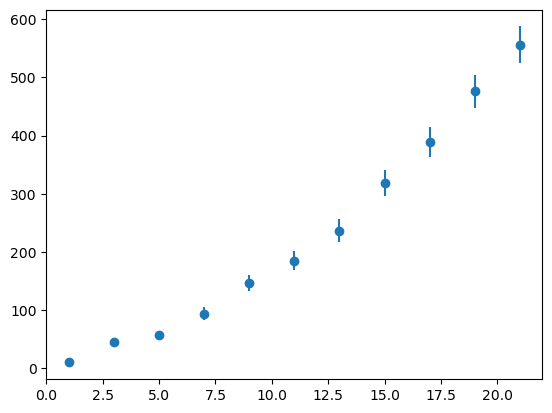

In [64]:
plt.errorbar( t, s,err_s, marker ='o', linestyle ='none' )

In [65]:
#try the constant speed model:
a = np.arange( .5, 20, .5 )
u = np.arange( .5, 40, .5 )
c = np.arange( .5, 40, .5 )

In [66]:
# s = u * t + const
r_square = np.zeros( ( len( u ), len( c ) ) )

for i in range( len( u ) ):
    for j in range( len( c ) ):
        y_theory           =  u[ i ] * t + c[ j ]
        r_square[ i, j ] = np.sum( ( s - y_theory )**2 / err_s**2 )


In [67]:
print( np.min( r_square/(len(s)-1) ))
q = np.where( r_square == np.min( r_square ))
print(u[q[0]],c[q[1]])
best_mod_lin = u[ q[0] ] * t + c[ q[ 1 ] ]



12.304588880712775
[18.] [0.5]


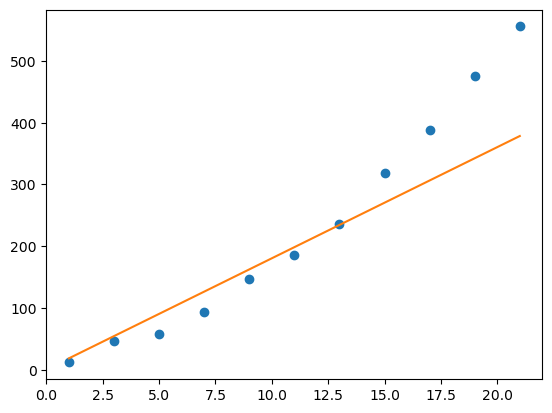

In [68]:
plt.plot( t, s, marker ='o', linestyle ='none' )
plt.plot( t, best_mod_lin)

In [69]:
# try acceleratiing model:

# s = 0.5 * a* t**2 + u * t + const
r_square = np.zeros( ( len( u ), len( c ) , len(a) ) )


for i in range( len( u ) ):
    for j in range( len( c ) ):
        for k in range( len( a) ):
            y_theory           =  0.5* a[ k ] * t**2 +  u[ i ] * t + c[ j ]
            r_square[ i, j , k ] = np.sum( ( s - y_theory )**2 / err_s**2 )


In [70]:
q2 = np.where( r_square == np.min( r_square ) ) # 3 elements 
print(np.min(r_square)/(len(s) - 2))

best_model_acc = 0.5 * a[ q2[ 2 ] ] * t**2 + u[ q2[ 0 ] ] * t + c[ q2[ 1 ] ]

1.0782393607646066


[1.5] [9.5] [2.]


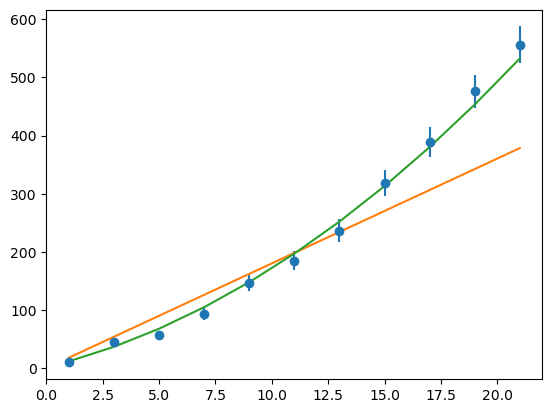

In [71]:
print(a[q2[2]],u[q2[0]],c[q2[1]])
plt.errorbar( t, s,err_s, marker ='o', linestyle ='none' )
plt.plot( t, best_mod_lin)
plt.plot( t, best_model_acc )

### we now know that our car *was* .....!

### Of course, Scipy has already the tools for you to do the fitting:

In [58]:
from scipy.optimize import curve_fit

In [59]:
### set up your function for a car that accelerates:

def distance_with_acceleration_print(t, u, c, a):
    """Calculate the distance travelled with at a constant speed u for a known time
    and constant acceleration a."""
    
    #print ("speed=",u, "acceleration=",a, 'constant=',c)
    return c + u* t + 0.5 * a * t**2 #y-theory 


In [61]:
t2, v2 = curve_fit( distance_with_acceleration_print, t , s, 
                       absolute_sigma = True, sigma = np.zeros( len( t ) ) + 12 )


Text(0, 0.5, 'Distance')

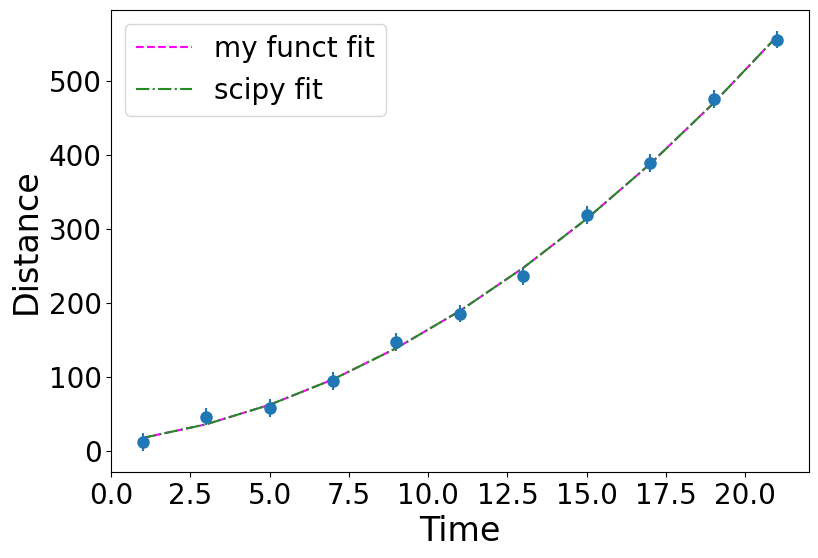

In [62]:
# let's compare the fits:


y4 = 5.22052 *t + 0.5 * 1.99318 * t**2 + 10.9311

plt.figure( figsize = (9, 6 ) )

plt.errorbar( t, s, yerr = 12., linestyle = 'none', marker='o', markersize = 8 )

# plot the new fit
plt.plot( t , y4, linestyle = '--', color = 'magenta', label = 'my funct fit' )

# or:
plt.plot( t, distance_with_acceleration_print( t, *t2), linestyle='-.', color='forestgreen',label ='scipy fit')

plt.xticks(fontsize =20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.xlabel('Time', fontsize = 24)
plt.ylabel('Distance', fontsize = 24)

#works nice on this example! Let's see more examples

In [56]:
print(t2)
print(v2)

[ 5.22052118 10.93110039  1.99318001]
[[ 5.40419488e+00 -2.22923038e+01 -4.61538378e-01]
 [-2.22923038e+01  1.21512575e+02  1.69930032e+00]
 [-4.61538378e-01  1.69930032e+00  4.19580346e-02]]


### We have data following this sine function: $ w = a* \sin(2*\pi \frac{t}{b})+c $


In [1]:
import numpy as np
import matplotlib.pyplot as plt

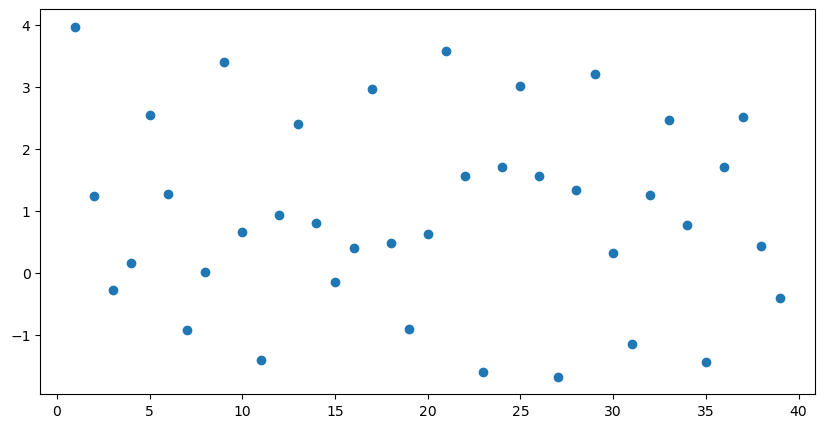

In [2]:

tw = np.arange(1,40,1)
w  = np.array([ 3.96838123,  1.2347536 , -0.28659576  ,0.16064933,  2.54715953,  1.27815974,
 -0.91929229 , 0.01300393 , 3.39636575 , 0.66465094, -1.41158169,  0.93323834,
  2.40457184,  0.79842956, -0.15261201 , 0.39569446,  2.97101324 , 0.47594539,
 -0.91273741 , 0.63033213,  3.57350699 , 1.56527141, -1.60574013 , 1.69854318,
  3.0131255   ,1.55600848, -1.67872146,  1.3382831 ,  3.21238516 , 0.32514177,
 -1.15733227 , 1.25311931,  2.4676918 ,  0.76427433, -1.43557062 , 1.70145249,
  2.50683363 , 0.43278036, -0.41304183])

plt.figure(figsize = (10,5))
plt.scatter(tw,w)

### Let's fit it assuming that a,b and c $\in [0.1,6)$ and $\sigma = 0.8$

In [3]:
a = np.linspace( 0.1, 6.1, 60 )
b = np.linspace( 0.1, 6.1 , 60 )
c = np.linspace( 0.1, 6.1 , 60 )

chi_square = np.zeros( ( len( a ), len( b ), len( c ) ) )

sigma = np.zeros(len(w)) + 0.8
#sigma[5] += 2.5
#sigma[10] = .0001

for i in range( len( a ) ):
    for j in range( len( b ) ):
        for k in range( len( c ) ):
            w_theory              = a[ i ] * np.sin( 2 * np.pi * tw / b[ j ] ) + c[ k ]
            chi_square[ i, j, k ] = np.sum( ( w - w_theory )**2 / sigma**2 )



23.0711216879844 (array([18]), array([38]), array([9])) 23.0711216879844 [1.93050847] [3.96440678] [1.01525424]
0.6235438294049839


Text(0, 0.5, 'wave')

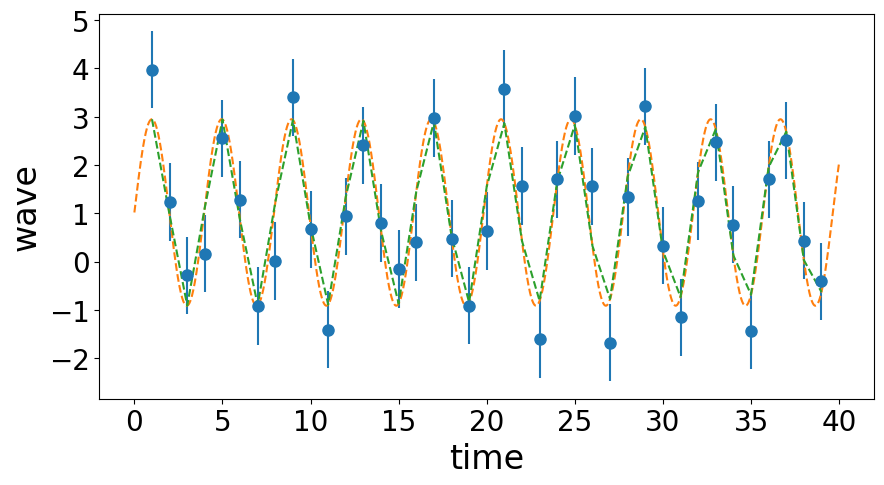

In [30]:
#use the minimum value to plot your data:
q = np.where(chi_square == np.min( chi_square ) )
print( np.min(chi_square),q,chi_square[18,38,9], a[ q[ 0 ] ], b[ q[ 1 ] ], c[ q[ 2 ] ] )

dof = len(w) - (3 - 1)

print(np.min(chi_square)/dof)

tww = np.arange(0,40,0.01)
y3 = a[ q[ 0 ] ] * np.sin( 2 * np.pi * tww / b[ q[ 1 ] ] ) + c[ q[ 2 ] ]
y2 = a[ q[ 0 ] ] * np.sin( 2 * np.pi * tw / b[ q[ 1 ] ] ) + c[ q[ 2 ] ]

plt.figure( figsize = ( 10 , 5 ) )

plt.errorbar(tw, w, yerr=sigma,linestyle='none', marker='o', markersize = 8)
plt.plot(tww, y3,linestyle='--')
plt.plot(tw, y2,linestyle='--')


plt.xticks( fontsize =20)
plt.yticks( fontsize = 20)
plt.xlabel('time', fontsize = 24)
plt.ylabel('wave', fontsize = 24)


### Is this a sine or cosine function?

In [72]:


tw = np.arange(1,40,1)
w  = np.array( [ 2.73155223e+00 , 3.17368658e+00 , 2.08082264e+00,  7.08391866e-01,
 -1.02196616e-01, -3.66845259e-01, -7.47889353e-01,  8.52096473e-01,
  2.13320321e+00,  2.73754612e+00,  2.36456758e+00,  1.66566340e+00,
 -6.78664125e-01, -1.12492492e-01, -1.92925580e-01,  1.59608994e+00,
  2.94364482e+00,  2.39214715e+00,  2.42116101e+00,  7.49597754e-01,
 -1.26025273e+00, -6.33402949e-01,  8.56344418e-02 , 1.84353600e+00,
  2.47992405e+00,  2.76758273e+00,  3.01939636e+00,  4.81326171e-01,
 -1.12837078e+00, -3.75890761e-02, -1.33917103e+00,  3.20806668e-01,
  1.83529070e+00,  2.03098421e+00,  2.33727279e+00,  2.72209809e-03,
 -6.47557862e-01, -4.87585375e-01, -3.13698707e-01] )



In [73]:
##Test 1:

#assume  w = c*np.sin(2*np.pi*t/P)+c


a = np.arange(0.1, 10, 0.1)
b = np.arange(0.1, 10 , 0.1)
b = np.arange(0.1, 10 , 0.1)

chi_square = np.zeros((len(a),len(b),len(c)))

sigma = .8

for i in range(len(a)):
    for j in range(len(b)):
        for k in range(len(c)):
            w_theory              = a[ i ] * np.sin( 2 * np.pi * tw / b[ j ] ) + c[ k ]
            chi_square[ i, j, k ] = np.sum( (w - w_theory )**2 /sigma**2 )




#use the minimum value to plot your data:
q = np.where(chi_square == np.min( chi_square ) )
#print(np.min(chi_square), a[q[0]], b[q[1]], c[q[2]])

y2 = a[q[0]] * np.sin(2*np.pi*tw/b[q[1]]) + c[q[2]]



##Test 2:

#assume  w = c*np.cos(2*np.pi*t/P)+c

a = np.arange(0.1, 10, 0.1)
b = np.arange(0.1, 10 , 0.1)
b = np.arange(0.1, 10 , 0.1)

chi_square = np.zeros( ( len( a ), len( b ), len( c ) ) )

sigma = .8

for i in range(len(a)):
    for j in range(len(b)):
        for k in range(len(c)):
            w_theory              = a[ i ] * np.cos(2*np.pi*tw/b[j]) + c[k]
            chi_square[ i, j, k ] = np.sum((w-w_theory)**2/sigma**2)




#use the minimum value to plot your data:
q= np.where(chi_square == np.min(chi_square))
#print(np.min(chi_square), a[q[0]], b[q[1]], c[q[2]])

y3 = a[q[0]] * np.cos(2*np.pi*tw/b[q[1]]) + c[q[2]]


In [81]:
print(a[q[0]],b[q[1]],c[q[2]])

[1.4] [8.6] [1.]


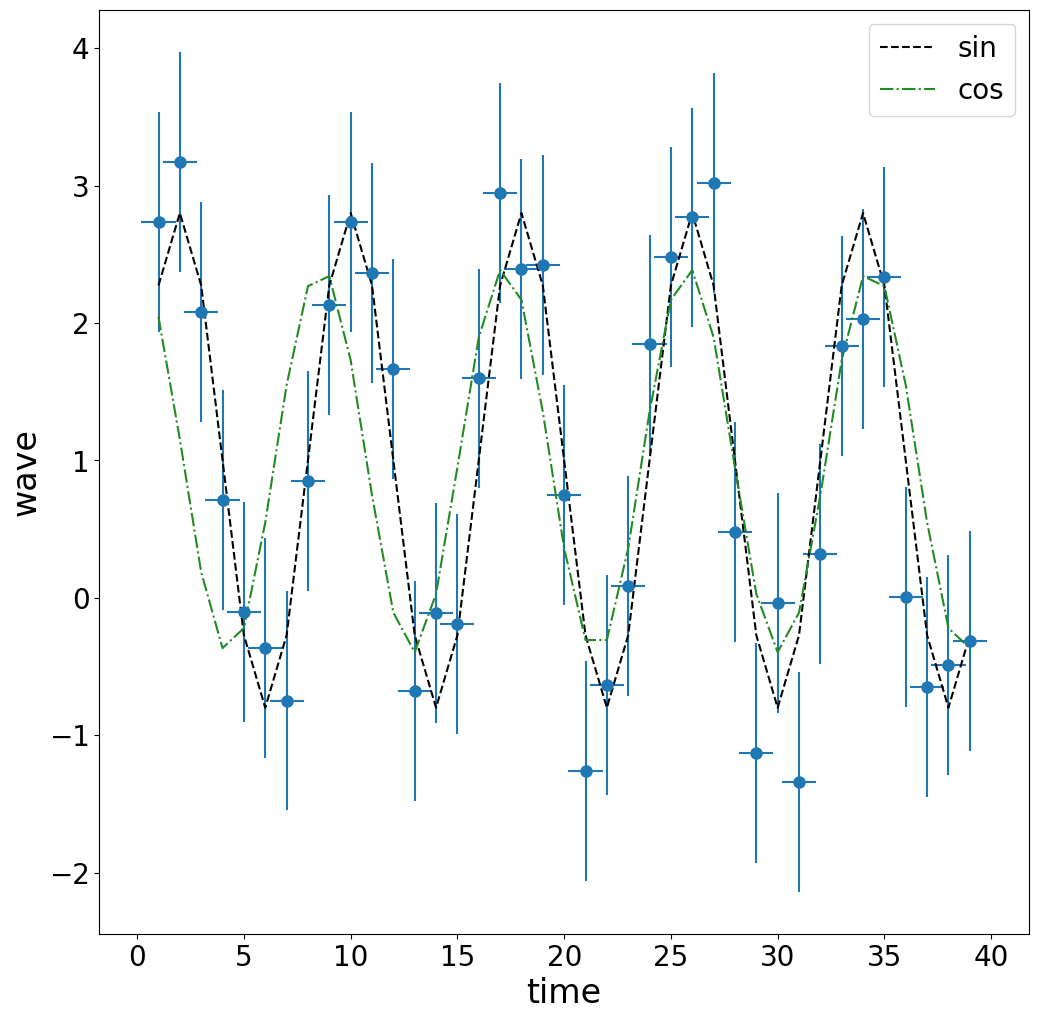

In [74]:
plt.figure(figsize=(12,12))

plt.errorbar(tw, w, yerr = sigma, xerr = 0.8, linestyle = 'none', marker = 'o', markersize = 8)
plt.plot(tw, y2,linestyle='--',color='black', label = 'sin' )
plt.plot(tw, y3,linestyle='-.',color='forestgreen', label = 'cos')


plt.xticks( fontsize = 20 )
plt.yticks( fontsize =  20 )
plt.xlabel( 'time', fontsize = 24 )
plt.ylabel( 'wave', fontsize = 24 )
plt.legend( fontsize =20 )


In [21]:
from scipy.optimize import curve_fit
curve_fit?

Signature:
curve_fit(
    f,
    xdata,
    ydata,
    p0=None,
    sigma=None,
    absolute_sigma=False,
    check_finite=True,
    bounds=(-inf, inf),
    method=None,
    jac=None,
    *,
    full_output=False,
    **kwargs,
)
Docstring:
Use non-linear least squares to fit a function, f, to data.

Assumes ``ydata = f(xdata, *params) + eps``.

Parameters
----------
f : callable
    The model function, f(x, ...). It must take the independent
    variable as the first argument and the parameters to fit as
    separate remaining arguments.
xdata : array_like
    The independent variable where the data is measured.
    Should usually be an M-length sequence or an (k,M)-shaped array for
    functions with k predictors, and each element should be float
    convertible if it is an array like object.
ydata : array_like
    The dependent data, a length M array - nominally ``f(xdata, ...)``.
p0 : array_like, optional
    Initial guess for the parameters (length N). If None, then the
    initia

### Let's try curvefit:

In [22]:
def wave_funct(tw, b, a, c):
    """test if your data are a sin function """
    
    return a * np.sin(2*np.pi*tw/b) + c


[[ 7.49619825e-06 -3.38112054e-05 -4.41425170e-05]
 [-3.38112054e-05  3.47119457e-01  4.80263174e-03]
 [-4.41425170e-05  4.80263174e-03  1.74910994e-01]]


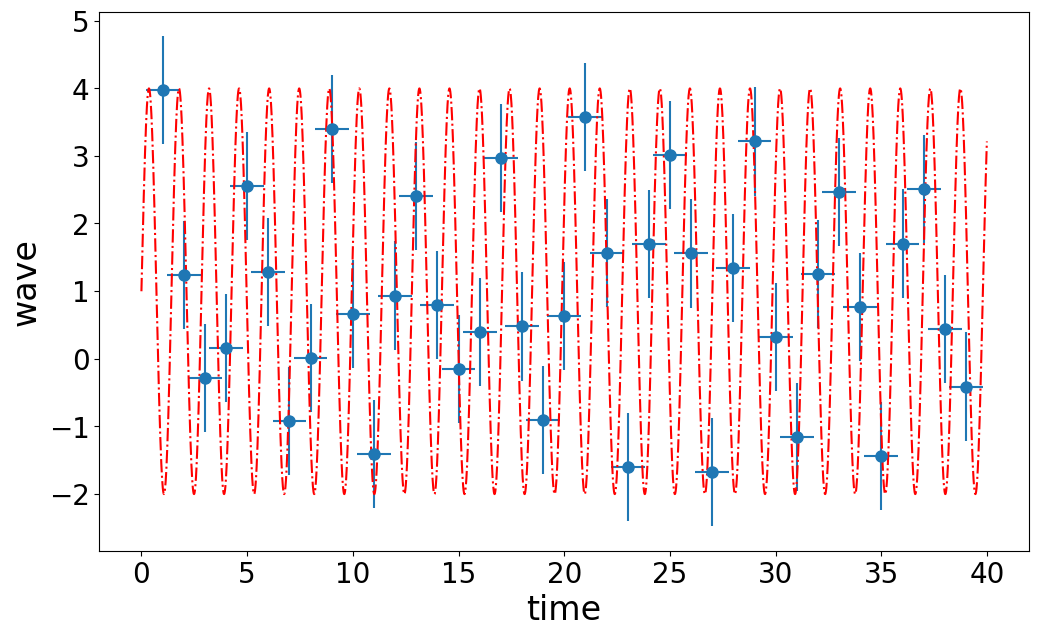

In [32]:
ts, ws = curve_fit(wave_funct, tw , w, p0 = [1.4,3.6,1],bounds = ([1,3,.5],[2,5,1.5])) # like this it gets stuck in a local minimum

print(ws)
plt.figure(figsize=(12,7))

plt.errorbar(tw, w, yerr=sigma, xerr=0.8,linestyle='none', marker='o', markersize = 8)
#plt.plot(tw, y2,linestyle='--',color='black')
#plt.plot(tw, y3,linestyle='-.',color='forestgreen')
plt.plot(tww, wave_funct(tww, *ts),linestyle='-.',color='red',label ='scipy fit')



plt.xticks(fontsize =20)
plt.yticks(fontsize = 20)
plt.xlabel('time', fontsize = 24)
plt.ylabel('wave', fontsize = 24)
plt.show()


### Oops! What happened here? 

### curve_fit got stuck in a local minimum.....

### Caution: some methods are prone to getting stuck in local (not the global) minima! 


### 1. Read practice_reading_numpy.dat from demos/ in a numpy array. Assign its columns to arrays x, y, z, w and q. Plot q(x). Your observations could be a function of the form:

- sin( 2 $\pi \frac{x}{ P}$ )*A
- cos( 2 $\pi \frac{x}{ P}$) *A
- sin( 2 $\pi  \frac{x}{ P}$ ) * $\log_{10}(\frac{x}{ B}) $* A
- cos( 2 $\pi \frac{x}{ P}$) * $\log_{10}( \frac{x}{ B} )$ * A

### with P, A and B constants. Which is the model that best describes your observations q(x) ? what about z(x) ? Try to find the solution without using curve_fit

In [102]:
# read in data:
data = np.genfromtxt('practice_reading_numpy.dat')
np.shape(data)
#assign columns to variables x, y, z, w and q:
x = data[:,0]
y = data[:,1]
z = data[:,2]
w = data[:,3]
q = data[:,4]
sigma = 0.05



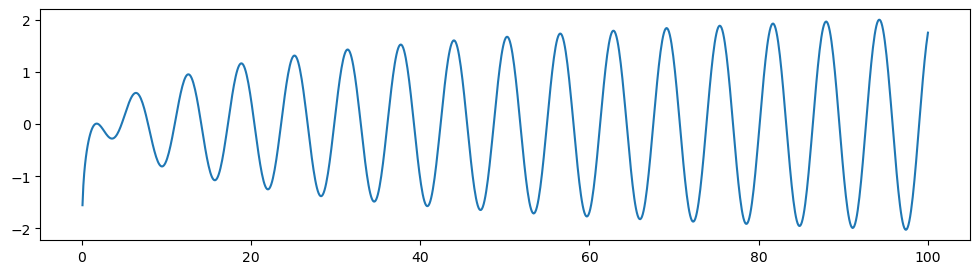

In [100]:
# plot it first to get a feeling for what the best-fit model might be from all 4 options:
plt.figure(figsize = (12,3))

plt.plot(x,data[:,3])
    

In [141]:
# what do we need to do now? least-squares fitting:

#test model sin( 2 $\pi  \frac{x}{ P}$ ) * $\log_{10}(\frac{x}{ B}) $* A

def my_func(x,P,B,A):
    return np.sin(2*np.pi*x/P)*np.log10(x/B)*A
    
Ps = np.arange(1, 14, 0.2)
Bs = np.arange(0.5, 10 , 0.2)
As = np.arange(0.1, 10 , 0.2)

chi_sq = np.zeros((len(Ps),len(Bs),len(As)))

dof = len(x) - (3 - 1)

for i in range(len(Ps)):
    for j in range(len(Bs)):
        for k in range(len(As)):
            y_theory = my_func(x,Ps[i],Bs[j],As[k])
            chi_sq_red = np.sum((w - y_theory)**2/sigma**2/dof)
            chi_sq[i,j,k] = chi_sq_red


In [142]:
# get minimum  and its best fit parameters:
a = np.where(chi_sq == np.min(chi_sq))
print(chi_sq[a],Ps[a[0]],Bs[a[1]],As[a[2]])

[245.34115597] [6.2] [6.3] [1.3]


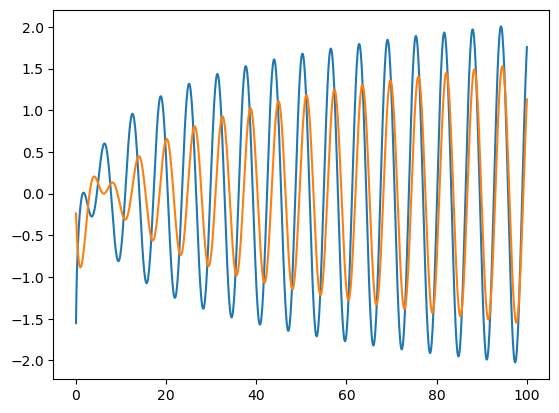

In [143]:
# check it out:
y_theory = my_func(x,Ps[a[0]],Bs[a[1]],As[a[2]])

plt.plot(x,data[:,3])
plt.plot(x,y_theory)

In [ ]:
#compare plots:

In [144]:
print(np.min(chi_sq))

245.34115596983622


In [ ]:
#### true model that went in this is: sin( 2 $\pi$ x / P ) * $\log_{10}( x  ) $ check! with P = 5;

### 2. We have numpy arrays: 

x = [0.25,0.5,0.75,1.,1.25,1.5,1.75,2.,2.25,2.5, 2.75,3.,3.25,3.5,3.75,4.0,4.25,4.5,4.75,5.0,5.25] 

y =[14.059, 19.18, 26.26,  25.95, 31.567,  44.464, 49.88,  64.016, 79.34, 93.229, 104.985, 113.425, 130.466, 150.331, 168.620, 185.888, 207.500, 225.716, 241.891, 268.802, 287.936] . 

### and y-error bars: 

sigma = [12.536, 13.601, 11.8492, 15.937, 12.6478, 13.927, 11.445, 10.224, 12.981, 10.969, 11.666, 12.060, 10.173, 10.292, 14.507, 12.195, 11.578, 9.321, 12.602, 13.03,8.6004].

 - You know that the data should be fit by the model: $a x^2+b x+c$. Create arrays a1, b1 and c1 that scan the range 0 to 10, 0 to 15 and 0 to 10 respectively, with a step of 0.1 (so a1 = np.arange(0, 10, 0.1) ). For each possible combination of (a1, b1, c1) calculate the least square difference of the model to the observations. Which model is the best fit model? Print the best-fit parameters (a1, b1, c1).

 - Create a function fit_my_curve(t, a, b, c) that fits a curve of the form $a x^2+b x+c$ and calculates the parameters a,b,c. Use curve_fit to fit the data (see demo). Plot y(x) with errorbars sigma, and overplot the fitted curve. Save figure using the appropriate commands and naming conventions.

 - Create a function fit_my_curve_2(params, t, y) that fits a curve of the form $a x^2+b x+c$. Use leastsq to fit the data (see demo). Plot y(x) with errorbars sigma, and overplot the fitted curve. Save figure using the appropriate commands and name conventions.

Text(0, 0.5, 'y')

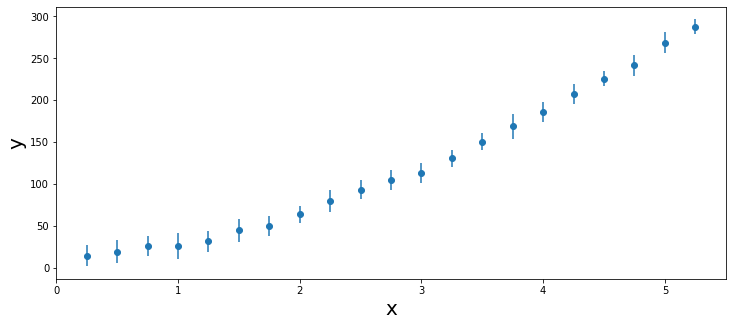

In [123]:
x = np.array([0.25,0.5,0.75,1.,1.25,1.5,1.75,2.,2.25,2.5, 2.75,3.,3.25,3.5,3.75,4.0,4.25,4.5,4.75,5.0,5.25] )
y = np.array([14.059, 19.18, 26.26,  25.95, 31.567,  44.464, 49.88,  64.016, 79.34, 93.229, 104.985, 113.425, 
     130.466, 150.331, 168.620, 185.888, 207.500, 225.716, 241.891, 268.802, 287.936] )
sigma = np.array([12.5357806 , 13.60113206, 11.84892057, 15.93705285, 12.64771554,
        13.92678159, 11.44483822, 10.22352192, 12.9813505 , 10.96907422,
        11.66618969, 12.0604899 , 10.17309145, 10.29161505, 14.50724923,
        12.19490092, 11.57796134, 9.32115802, 12.60187156, 13.0297564 ,
        8.60039528])

fig, ax =  plt.subplots(figsize = (12,5))
ax.errorbar(x,y,sigma,marker = 'o',linestyle = "None")
ax.set_xlabel("x",fontsize = 20)
ax.set_ylabel("y",fontsize = 20)

In [156]:
# do it brute-force first for y = a* x^2+b * x+c

c = np.arange(5,9,.05)
b = np.arange(10,14,.05)
a = np.arange(7,9,.05)

In [157]:
chisq = np.zeros((len(a),len(b),len(c)))
dof = len(y) - (3 - 1)#number of degrees of freedom

for i in range(len(a)):
    for j in range(len(b)):
        for k in range(len(c)):
            y_theory = a[i]*x**2 + b[j]*x + c[k]
            chisq[i,j,k] = np.sum((y - y_theory)**2/sigma**2)/dof

In [158]:

best_index = np.where(chisq == np.min(chisq))
print(best_index,a[best_index[0]],b[best_index[1]],c[best_index[2]],np.min(chisq))


(array([15]), array([60]), array([70])) [7.75] [13.] [8.5] 0.0671600215616359


In [2]:
# use fcurve_fit
 

best,cov = curve_fit(my_func,x,y)


In [ ]:
def fit_my_curve_2(params, t, y):
      """Calculate the parameters a,b,c for fitting a curve of the form: 
      a*x^2 + b*x +c ."""
    #note that from reading the manual of leastsq you need to return f(x)- y and the leastsq does the fitting to 
    #minimize your function's return
      return (params[2] + params[1] * t + params[0] * t**2) - y

#start from an initial guess:
init_guess = [3,8,2]

#call leastsq:
a = leastsq(fit_my_curve_2, init_guess, args=(x, y))

#this returns the fit of a,b,c as: a[0][0],a[0][1] and a[0][2]
print(a)
#real:  8* x**2+ 12*x + 4
print(a[0][0])


## 3. Is there life out there? 

### You have detected two planets orbiting a star like our Sun and they are in the habitable zone! You need to figure out if they may host life! 

### Get your observational data from file: knightro_2024_bc_photometry.dat and plot it to see what your observations look like (column 1 is wavelength, columns 2 and 3 and the flux from the two planets)

### Get your models from limited_models.dat . Combine up to 3 models at a time and compare with the data. What is the best-fit make up of your your planet?

In [ ]:
# read the "actual observations" we will compare our models with

observations = 
wavelength   = 
planet1      = 
planet2      = 

In [ ]:

#let's plot the observations to see what we deal with:

#plt.figure( figsize= (8,8) )
#plt.plot( , marker = 'o' , linestyle = 'none')
#plt.plot( , marker = 's' , linestyle = 'none')



In [ ]:
#get models; read limited_models.dat; assign: 0: wavelengths, 1: forest, 2: ocean
# 3: sand, 4: ice
models  =
wav_mod = 
forest  = 
ocean   = 
sand    = 
ice     = 

In [ ]:
#plt.figure( figsize= (8, 8) )
#plt.plot( wav_mod, sand, marker = 's', linestyle = 'none')

In [ ]:
#! notice that models have more points than observations; don't want to compare eggs with oranges...interpolate
# to the grid of the observations first:


for1 = np.interp( observations[:,0],  wav_mod, forest )
oc1 = np.interp( observations[:,0],  wav_mod, ocean)
san1 = np.interp( observations[:,0],  wav_mod, sand )
ice1 = np.interp( observations[:,0],  wav_mod, ice )

### now how do we combine them up to 3 at a time and get the best-fit model?

In [ ]:


chisq1 = np.zeros( (10, 10) )  #planet 1
chisq2 = np.zeros( (10, 10) )  # planet 2 

#let's try forest-ocean-sand:

for i in range( len( a ) ):
 #   for ....
       
    
           
# get minimum:

min_one       = np.min( chisq1)
where_is_that = np.where( chisq1 == min_one )

print( "Planet 1: Min $\chi^2$ of:", min_one , 'for model with', where_is_that[0]*10, '% forest, ', 
      where_is_that[1]*10, '% ocean and', 100-( where_is_that[0]+ where_is_that[1]) *10, '% sand.'  ) 

min_one2       = np.min( chisq2)
where_is_that2 = np.where( chisq2 == min_one2 )

print( "Planet 2: Min $\chi^2$ of:", min_one2 , 'for model with', where_is_that2[0]*10, '% forest, ', 
      where_is_that2[1]*10, '% ocean and', 100-( where_is_that2[0]+ where_is_that2[1]) *10, '% sand.'  ) 

In [ ]:
#let's try forest-sand-ice:
chisq1 = np.zeros( (10, 10) )  #planet 1
chisq2 = np.zeros( (10, 10) )  # planet 2 


for i in range( len( a ) ):
    for j in range( len( b ) ):
        
        #note that I can skip a 3rd for loop because a + b + c needs to be 1. (100% planet);
        model_test = a[ i ] * for1 + b[ j ] * san1 + ( 1 -a[ i ] - b[ j ] ) * ice1
        
        #get the chi-square:
        chisq1[ i, j] = np.sum(( ( observations[:,1]-  model_test ) **2)/ model_test**2 )
        chisq2[ i, j] = np.sum(( ( observations[:,2]-  model_test ) **2)/ model_test**2 )
                    
# get minimum:

min_one       = np.min( chisq1)
where_is_that = np.where( chisq1 == min_one )

print( "Planet 1: Min $\chi^2$ of:", min_one , 'for model with', where_is_that[0]*10, '% forest, ', 
      where_is_that[1]*10, '% sand and', 100-( where_is_that[0]+ where_is_that[1]) *10, '% ice.'  ) 

min_one2       = np.min( chisq2)
where_is_that2 = np.where( chisq2 == min_one2 )

print( "Planet 2: Min $\chi^2$ of:", min_one2 , 'for model with', where_is_that2[0]*10, '% forest, ', 
      where_is_that2[1]*10, '% sand and', 100-( where_is_that2[0]+ where_is_that2[1]) *10, '% ice.'  ) 

In [ ]:
### and last ocean, sand and ice:

#let's try forest-ocean-ice:
chisq1 = np.zeros( (10, 10) )  #planet 1
chisq2 = np.zeros( (10, 10) )  # planet 2 


for i in range( len( a ) ):
    for j in range( len( b ) ):
        
        #note that I can skip a 3rd for loop because a + b + c needs to be 1. (100% planet);
        model_test = a[ i ] * san1 + b[ j ] * oc1 + ( 1 -a[ i ] - b[ j ] ) * ice1
        
        #get the chi-square:
        chisq1[ i, j] = np.sum(( ( observations[:,1]-  model_test ) **2)/ model_test**2 )
        chisq2[ i, j] = np.sum(( ( observations[:,2]-  model_test ) **2)/ model_test**2 )
            
# get minimum:

min_one       = np.min( chisq1)
where_is_that = np.where( chisq1 == min_one )

print( "Planet 1: Min $\chi^2$ of:", min_one , 'for model with', where_is_that[0]*10, '% sand, ', 
      where_is_that[1]*10, '% ocean and', 100-( where_is_that[0]+ where_is_that[1]) *10, '% ice.'  ) 

min_one2       = np.min( chisq2)
where_is_that2 = np.where( chisq2 == min_one2 )

print( "Planet 2: Min $\chi^2$ of:", min_one2 , 'for model with', where_is_that2[0]*10, '% sand, ', 
      where_is_that2[1]*10, '% ocean and', 100-( where_is_that2[0]+ where_is_that2[1]) *10, '% ice.'  ) 



In [ ]:
# compare!

### where do we look for life?

### 4. You have the measurements x and y (see below). You know that they could be described by one of these models:

- y1 = np.pi * x1

- y2 = 2*np.pi*x1/16

- y3 = 2*np.pi*x1/4  , with x1 = np.linspace(1,100, 20)

### Find which model best fits your measurements.



In [ ]:
x= np.linspace(1,100,200)

y = np.array([  1.57079633,   2.35224777,   3.1336992 ,   3.91515064,
         4.69660208,   5.47805352,   6.25950496,   7.0409564 ,
         7.82240784,   8.60385928,   9.38531072,  10.16676216,
        10.94821359,  11.72966503,  12.51111647,  13.29256791,
        14.07401935,  14.85547079,  15.63692223,  16.41837367,
        17.19982511,  17.98127654,  18.76272798,  19.54417942,
        20.32563086,  21.1070823 ,  21.88853374,  22.66998518,
        23.45143662,  24.23288806,  25.0143395 ,  25.79579093,
        26.57724237,  27.35869381,  28.14014525,  28.92159669,
        29.70304813,  30.48449957,  31.26595101,  32.04740245,
        32.82885389,  33.61030532,  34.39175676,  35.1732082 ,
        35.95465964,  36.73611108,  37.51756252,  38.29901396,
        39.0804654 ,  39.86191684,  40.64336827,  41.42481971,
        42.20627115,  42.98772259,  43.76917403,  44.55062547,
        45.33207691,  46.11352835,  46.89497979,  47.67643123,
        48.45788266,  49.2393341 ,  50.02078554,  50.80223698,
        51.58368842,  52.36513986,  53.1465913 ,  53.92804274,
        54.70949418,  55.49094561,  56.27239705,  57.05384849,
        57.83529993,  58.61675137,  59.39820281,  60.17965425,
        60.96110569,  61.74255713,  62.52400857,  63.30546   ,
        64.08691144,  64.86836288,  65.64981432,  66.43126576,
        67.2127172 ,  67.99416864,  68.77562008,  69.55707152,
        70.33852296,  71.11997439,  71.90142583,  72.68287727,
        73.46432871,  74.24578015,  75.02723159,  75.80868303,
        76.59013447,  77.37158591,  78.15303734,  78.93448878,
        79.71594022,  80.49739166,  81.2788431 ,  82.06029454,
        82.84174598,  83.62319742,  84.40464886,  85.1861003 ,
        85.96755173,  86.74900317,  87.53045461,  88.31190605,
        89.09335749,  89.87480893,  90.65626037,  91.43771181,
        92.21916325,  93.00061468,  93.78206612,  94.56351756,
        95.344969  ,  96.12642044,  96.90787188,  97.68932332,
        98.47077476,  99.2522262 , 100.03367764, 100.81512907,
       101.59658051, 102.37803195, 103.15948339, 103.94093483,
       104.72238627, 105.50383771, 106.28528915, 107.06674059,
       107.84819203, 108.62964346, 109.4110949 , 110.19254634,
       110.97399778, 111.75544922, 112.53690066, 113.3183521 ,
       114.09980354, 114.88125498, 115.66270641, 116.44415785,
       117.22560929, 118.00706073, 118.78851217, 119.56996361,
       120.35141505, 121.13286649, 121.91431793, 122.69576937,
       123.4772208 , 124.25867224, 125.04012368, 125.82157512,
       126.60302656, 127.384478  , 128.16592944, 128.94738088,
       129.72883232, 130.51028375, 131.29173519, 132.07318663,
       132.85463807, 133.63608951, 134.41754095, 135.19899239,
       135.98044383, 136.76189527, 137.54334671, 138.32479814,
       139.10624958, 139.88770102, 140.66915246, 141.4506039 ,
       142.23205534, 143.01350678, 143.79495822, 144.57640966,
       145.3578611 , 146.13931253, 146.92076397, 147.70221541,
       148.48366685, 149.26511829, 150.04656973, 150.82802117,
       151.60947261, 152.39092405, 153.17237548, 153.95382692,
       154.73527836, 155.5167298 , 156.29818124, 157.07963268])

#You have a number of theoretical models that are calculated on grade x1 and have values y1, y2, y3...
#how do you define which one is the best fit model?





In [ ]:
# do least square; and minimize

In [ ]:
### best model is ...

# Error propagation

### Quantities you measure have errors. How do you calculate the error of a quantity that is a combination of different measurements?  --> error propagation

### Assume you have observations y and x with errorbars yerr and xerr as here:

In [34]:
#define your parameters X and Y
x = np.linspace(1,100,400)
y = np.linspace(4,20,400)**.5

#define some random errorbars for your X and Y
x_err = np.random.random(len(x))*.5
y_err = np.random.random(len(y))*1.5


(array([0., 1., 2., 3., 4., 5., 6., 7.]),
 [Text(0, 0.0, '0'),
  Text(0, 1.0, '1'),
  Text(0, 2.0, '2'),
  Text(0, 3.0, '3'),
  Text(0, 4.0, '4'),
  Text(0, 5.0, '5'),
  Text(0, 6.0, '6'),
  Text(0, 7.0, '7')])

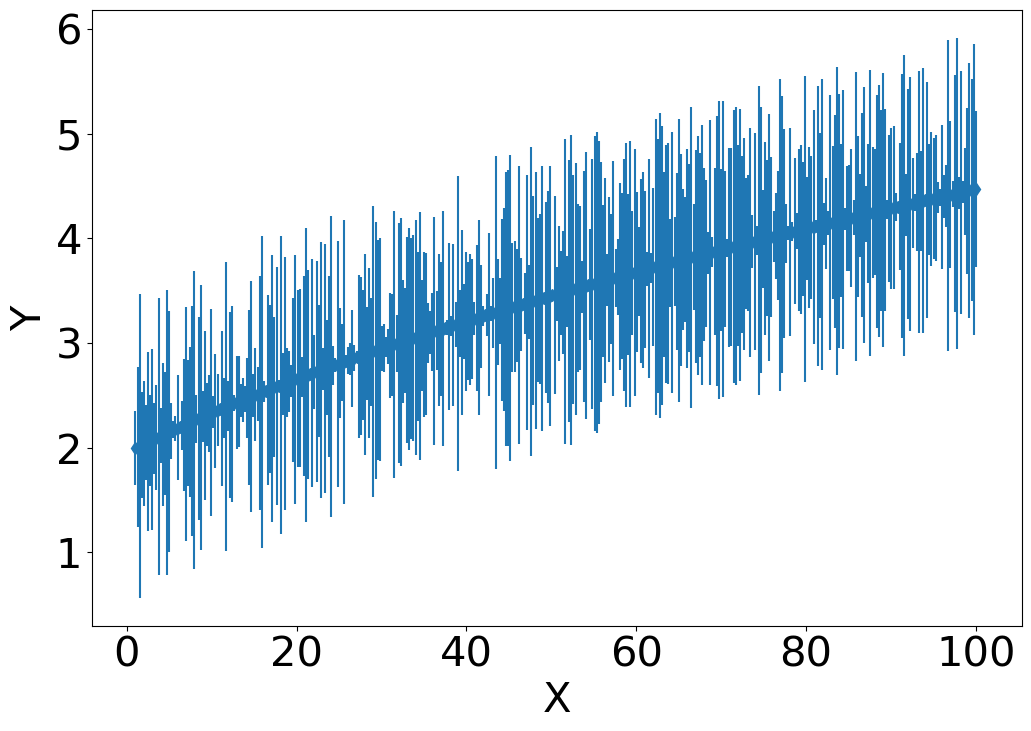

In [35]:
#Let's see what we "observed":
plt.figure( figsize = ( 12, 8) )
plt.errorbar(x,y, xerr=x_err, yerr= y_err ,linestyle='none',marker='d')
plt.xlabel('X',fontsize = 30)
plt.ylabel('Y', fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)

### Now assume that y and x are connected in a physical law with a quantity f like f = x * y (e.g., y could be the mass of a body, x its acceleration and f the force applied on the body). 

### Calculate f and plot f(x):

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.]),
 [Text(0, -100.0, '−100'),
  Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500')])

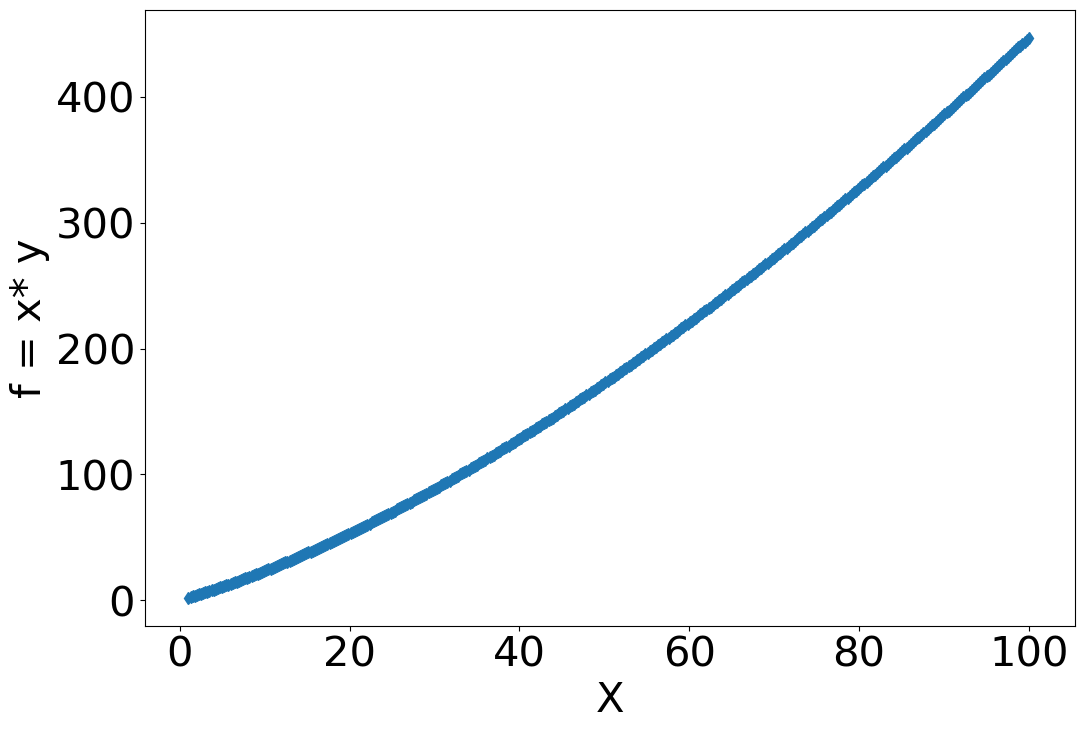

In [36]:
f = x *y

plt.figure( figsize = ( 12, 8 ) )
plt.errorbar(x,f, xerr=x_err ,linestyle='none',marker='d')
plt.xlabel('X',fontsize = 30)
plt.ylabel('f = x* y', fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)

### What is the error that I should assign to f? I know the error of x and y and I know how x and y give me f...

### Assuming you have measured x and y with errors $\delta$x and $\delta$y that are INDEPENDENT of each other, the error of $f = f(x, y )$ is given by:

### $\delta f = \sqrt{ (\frac{\partial f(x,y)}{\partial x} \delta x)^2 + (\frac{\partial f(x,y)}{\partial y} \delta y)^2 }$


#### If you don't know what $\frac{\partial f(x,y)}{\partial x}$ means it is $\sim \frac{df(y)}{dx}$, so for the error propagation example here assume that f(x,y) is 
- $f_y(x)$ and do the differentiation of f over x ignoring its y dependence; and
- $f_x(y)$ and do the differentiation of f over y ignoring its x dependence


#### with $f = x * y $ we would get $\frac{\partial f(x,y)}{\partial x} = y $ and $\frac{\partial f(x,y)}{\partial y} = x $ so: $f_{err} = \sqrt{ (y*\delta x)^2 + (x* \delta y)^2 )}$
 

(array([-100.,    0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.]),
 [Text(0, -100.0, '−100'),
  Text(0, 0.0, '0'),
  Text(0, 100.0, '100'),
  Text(0, 200.0, '200'),
  Text(0, 300.0, '300'),
  Text(0, 400.0, '400'),
  Text(0, 500.0, '500'),
  Text(0, 600.0, '600'),
  Text(0, 700.0, '700')])

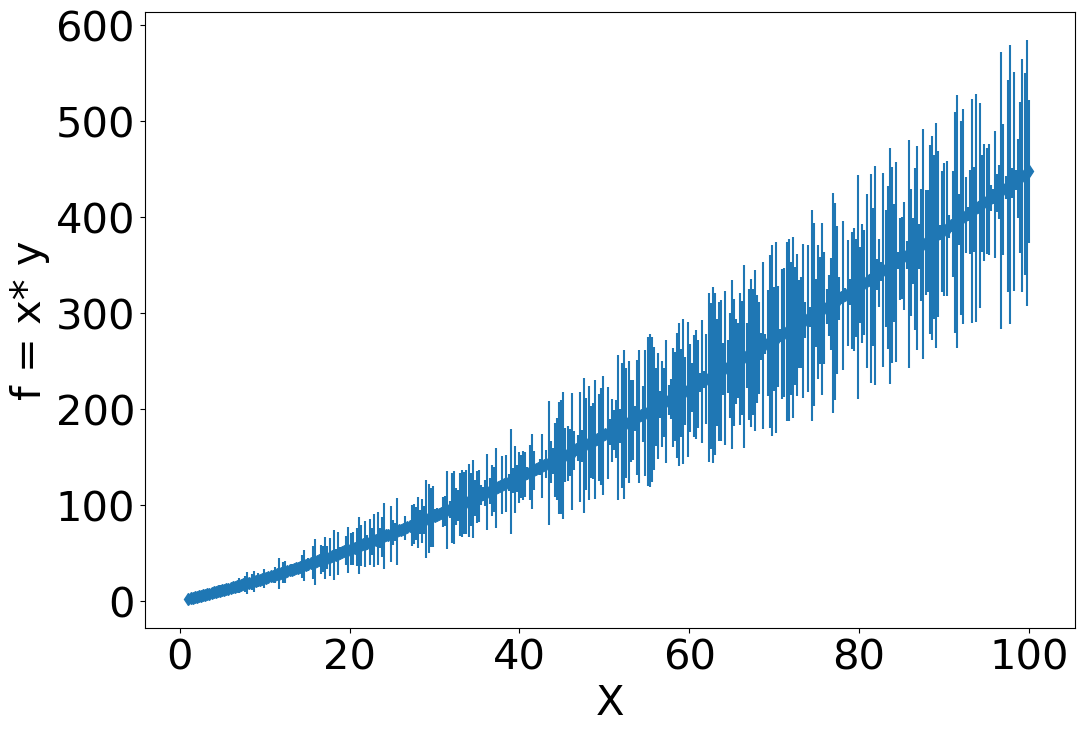

In [37]:
f_err = np.sqrt( (y*x_err)**2 + (x*y_err)**2 )


plt.figure( figsize = ( 12, 8 ) )
plt.errorbar(x,f, xerr=x_err, yerr = f_err, linestyle='none',marker='d')
plt.xlabel('X',fontsize = 30)
plt.ylabel('f = x* y', fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)

### Let's try a function: $f = \frac{x }{ y^2 }$

In [51]:
f = x/ y**2

### Use error propagation to get $\delta f$

#### $\frac{\partial f(x,y)}{\partial x} = ?? $

#### $\frac{\partial f(x,y)}{\partial y} = ?? $

In [52]:
f_err = np.sqrt( (x_err/y**2)**2 + ( -2* x * y_err /y**3) **2 )


(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

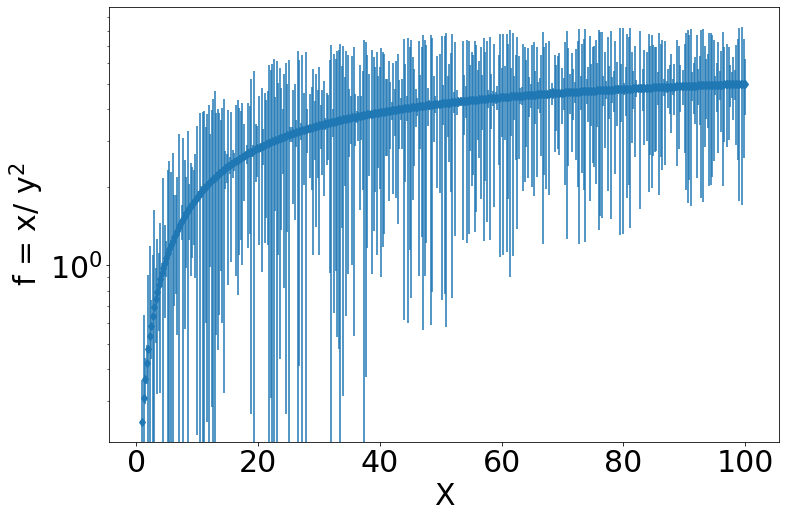

In [53]:
#Let's see what we got in a plot :

plt.figure( figsize = ( 12, 8) )

plt.errorbar(x, f, xerr = x_err, yerr= f_err ,linestyle='none',marker='d')
plt.xlabel('X',fontsize = 30)
plt.ylabel('f = x/ y$^2$', fontsize = 30)
plt.yscale('log')
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)


### Let's try a function: $f = \cos(x) *\sin(\frac{y}{4})$

In [ ]:
#use error propagation to calculate the error in f:

f = np.cos(x) * np.sin(y/4.)

# df/dx = ?
# df/ dy = ?

In [ ]:
dfdx = 
dfdy = 
f_err = np.sqrt( (dfdx * x_err) **2 + (dfdy *y_err) ** 2 )



In [ ]:

#Let's see what we got :
plt.figure( figsize = ( 12, 8 ) )
plt.errorbar( x, f, xerr = x_err, yerr = f_err ,linestyle='none',marker='d')
plt.xlabel('X',fontsize = 30)
plt.ylabel(r'f = cos(x) *sin($ \frac{y}{4}$ )', fontsize = 30)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)
plt.ylim( -1, 1)

### Let's try a function: $f = e^x  * \ln(y^2)$

In [ ]:
# get f:

f = np.exp(x) * np.log(y**2)

In [ ]:
## what is df/dx?
## what is df/dy?

In [ ]:
# get df:

dfdx = 
dfdy = 

f_err = np.sqrt( ( dfdx * x_err ) ** 2 + ( dfdy *y_err )**2 )



In [ ]:

#Let's see what we plotted:
plt.figure( figsize = (12, 8) )
plt.errorbar( x, f, xerr=x_err, yerr = f_err ,linestyle='none',marker='d')
plt.xlabel('X',fontsize = 30)
plt.ylabel('f = e$^x$ *ln(y$^2$)', fontsize = 30)
plt.xlim( 90, 100)
plt.xticks(fontsize = 30)
plt.yticks(fontsize = 30)


### Practicum time. 

### 1. You know that the radius of the Earth is 6,356 km. Assume its mantle and core cause a negligible refraction to seismic p waves. A seismic p-wave travels at 5.6km/ s and hits place A at 10: 00: 09 and place B on the other side of the Earth at 10: 37: 40. What was the depth of the epicenter?

<img src="earthquake.png" width=350 height=350 />

### 2.  You are given arrays with observations x and y, and the corresponding error in the measurement x_err and y_err. What are the corresponding values and error-bars for quantity $f(x,y) = x* \sin( y ) + \sqrt[3]{x} $ ? 

In [ ]:
x = np.array( [ 42.3, 12.5, 44,6, 18.3, 15.7, 82.1, 65.4, 75.6, 53.2, 22.3, 35., 55.2, 56.4, 80.2, 86., 68.  ] )
x_err = np.array([2.81375368, 0.08540501, 1.87199234, 0.34497076, 0.29795455, 0.78227453, 0.15090837, 2.8244208 , 
                 6.16508509, 3.33874134, 1.29143933, 1.62802492, 4.23052681, 3.42807668, 2.87669011, 2.55536329, 
                 3.04274511])

y = np.array([19.19384502,  7.28553391, 19.83324958,  4.24948974,  9.76784993, 8.67232255, 33.69090503, 27.70702665, 
              31.37482605, 23.25383301, 11.41228758, 16.41607978, 23.98967025, 24.42999334, 33.01544527, 35.0736185 ,
              28.64621125])
y_err = np.array([0.26509302, 0.0134772 , 0.41862496, 0.03052536, 0.02950779, 0.33969798, 1.54278188, 0.27892291, 
                 0.80318125, 0.46434622, 0.51352369, 0.65397114, 1.04427   , 0.91616869, 0.63403263, 1.00469923,
                 0.67141604])

### 3. Let's create a Python code that mimics unix commands 'cat', 'head -N' and 'wc'. For this problem you need to use file 'random_text.txt' from a previous demo. First let's refresh our minds about what these commands do....Then try to code a Python program that mimics these commands.

In [ ]:
# cat: concatinates the file -- shows you the whole text. How do we code this in Python?



In [ ]:
# head -N gives you the N first lines of the file. How do we code this in Python?


In [ ]:
# wc does a line, word and character count. How do we code this in Python?



### 4. Get file exoplanet_eu_catalog2.csv.
These are actual data from exoplanets. Plot the mass (column 2) versus the radius (columnn 8) of the planets. Use an errorbar plot and plot both mass-error (column 3) and radius-error (column 9). Calculate the average density of the planets ( $\rho = \frac{M}{ V } $ ) and its error. Then plot the average density vs their orbital period (column 11 and error is column 12) with errorbars. Note that units are weird (Jupiter radius and mass) and you need to convert them to gr and cm. How do these densities compare with Earth's (5.51 g/cm$^3$) and Jupiter's (1.33 g/cm$^3$) ? Plot two horizontal lines at the densities of these two planets for comparison.

In [ ]:
c1 = 6991100000 #Jupiter radius in centimeters
c2 = 1.898e30   #Jupiter mass in grams



### 5. White light falls on an ice crystal under angle $\theta_1 = 60^\circ$. 
Assume that the crystal was formed in a prism-like shape with $\alpha = 70 ^\circ$ and that the refractive index of the ice water is the same as that of ice (use H2O.refrind from demos/). Knowing that the angle of deviation for the light is given by:

 $ \mathrm{Dev} =  \theta_1 + \theta_2 - \alpha $, where
 $ \sin (\theta_2) = \sin( \alpha ) \sqrt{ n^2 - \sin(\theta_1) } - \cos(\alpha) \sin(\theta_1) $ 

 -  calculate the angle of deviation for *each* wavelength from 0.3$\mu$m to 1$\mu$m. What do you see?

# Part II: Over-fitting and under-fitting

### Final Project Hint: If Windows users have issues with the "torn book": it's an encoding issue use:  

- encoding="utf-8"

### inside your open file command and it will read it w/o issues.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import curve_fit


A problem you might encounter while trying to fit your data with models is under- or over- fitting them. In the first case our adopted model is too simple to constrain the data in the second case it is too complex, to the point that even noise in our observations is interpreted as part of the model.

## Over and underfitting data is bad because:
- you don't really get the underlying natural law that your data follow
- you cannot use your data and model fitting for predicting other data (Machine Learning applications)

### Let's create a random dataset we "observed"

In [3]:
x = np.linspace(0,3,30)
y = np.sin(2*x) +  np.random.random(len(x))*0.6

### and let's vizualise it:

<ErrorbarContainer object of 3 artists>

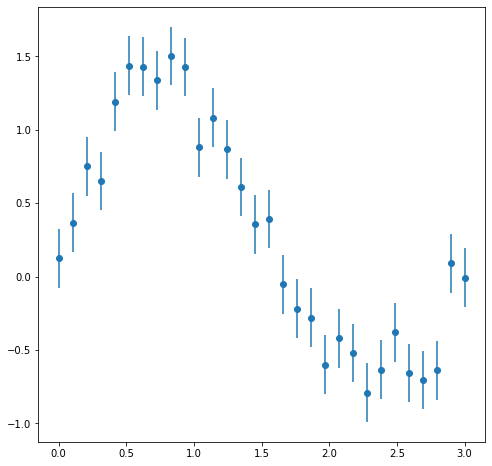

In [4]:
plt.figure( figsize = ( 8, 8 ) )
plt.errorbar( x, y, yerr = 0.2 , marker='o', linestyle = 'none')


### One of the most basic fits you could do would be a function a * x +b. Does it work here?

Text(0, 0.5, 'Y')

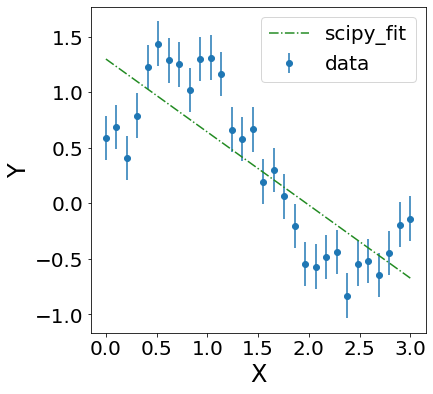

In [4]:
#Let's define our function for the line:
def my_fit_function(t, a, b):
    """fit your data with a straight line"""
    #y = a*t+b
    return b + a* t 


# call curve_fit
t2, v2 = curve_fit(my_fit_function, x , y, sigma = np.zeros(len(x))+0.2)

#plot your result: 
plt.figure( figsize = ( 6, 6 ) )

plt.errorbar( x, y, yerr = 0.2, marker = 'o', linestyle = 'none', label = 'data')
plt.plot( x, my_fit_function( x, *t2), linestyle = '-.', color = 'forestgreen', label ='scipy_fit')
plt.xticks( fontsize = 20 )
plt.yticks( fontsize = 20 )
plt.legend( fontsize = 20 )
plt.xlabel('X', fontsize = 24)
plt.ylabel('Y', fontsize = 24)

### This is *a* fit of the data. But, do you think it tells us the whole story? What we have done in this very simple example is that we underfitted the data: we got a fit of our data to a model, but there are clearly a lot of information about the nature of the data that our fit ignores! 

### Let's try a 7th order polynomial fit:

Text(0, 0.5, 'Y')

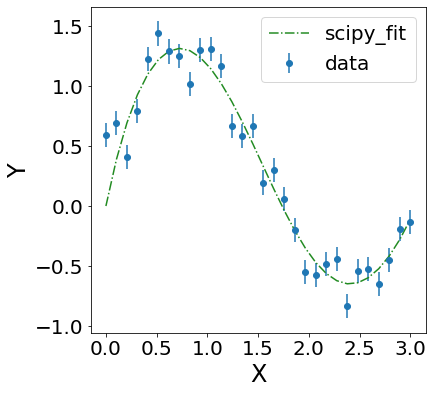

In [5]:
def my_fit_pol_function(t,  b, c, d, e, f, g, h):
    """fit your data with a 7th order polynomial"""
    #y =  b * t + c * t**2 + .... + h * t**7
    return  b * t + c * t**2 + d* t**3 + e * t**4  + f * t**5 + g * t**6 + h * t**7
#+  \
        #   i * t**8  +  j * t**9  + k * t**10. + l * t**11 + m * t**12+ n * t**13 + \
         #  o * t**14 + p * t**15. + q * t**16.


t2b, v2b = curve_fit(my_fit_pol_function, x , y, 
                        sigma = np.zeros(len(x))+0.2)


plt.figure(figsize=(6,6))

plt.errorbar( x, y, yerr = 0.1, marker = 'o', linestyle = 'none',label='data')
plt.plot( x, my_fit_pol_function(x, *t2b), linestyle = '-.', color = 'forestgreen',label ='scipy_fit')

plt.xticks( fontsize = 20 )
plt.yticks( fontsize = 20 )
plt.legend( fontsize = 20 )
plt.xlabel( 'X', fontsize = 24 )
plt.ylabel( 'Y', fontsize = 24 )

### fit seems improved, better constrained model. Still not perfect though...Would a higher order polynomial work?

### Numpy, of course, offers a polynomial function, you don't need to make it manually: np.polyfit()
https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html

In [3]:
## trying to fit 30 points of data with a 29th order polynomial!!!
zn = np.polyfit(x, y, 32)  # calculate your coeffs
print( zn )

NameError: name 'np' is not defined

In [7]:
z = np.poly1d( zn ) 
print( z )

           32             31            30            29           28
3.557e-05 x  - 0.0005303 x  + 0.002525 x  - 0.001238 x  - 0.01844 x 
              27          26          25          24         23
 - 0.0003854 x  + 0.1527 x  + 0.2235 x  - 0.9643 x  - 3.684 x 
          22         21         20         19         18        17
 + 2.029 x  + 37.04 x  + 44.14 x  - 272.9 x  - 778.9 x  + 1694 x 
         16             15             14             13             12
 + 8570 x  - 1.295e+04 x  - 7.841e+04 x  + 1.854e+05 x  + 4.438e+05 x 
              11             10             9             8
 - 2.895e+06 x  + 6.881e+06 x  - 9.962e+06 x + 9.792e+06 x
              7             6             5             4             3
 - 6.769e+06 x + 3.306e+06 x - 1.123e+06 x + 2.553e+05 x - 3.619e+04 x
         2
 + 2808 x - 88.26 x + 0.5872


(-1.0, 1.8)

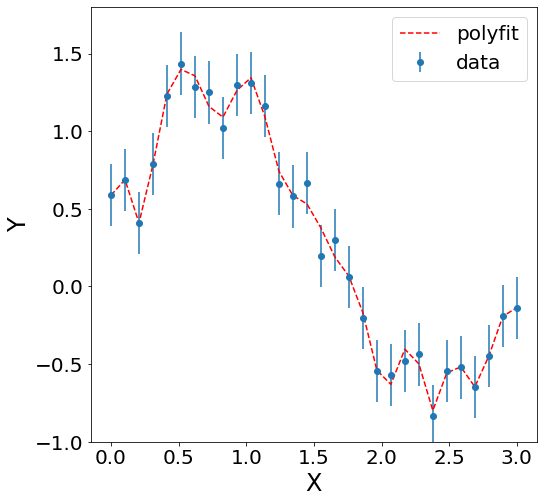

In [8]:

plt.figure( figsize = ( 8, 8 ) )

plt.errorbar( x, y, yerr = 0.2, marker = 'o', linestyle = 'none',label='data')

plt.plot( x, z(x) ,linestyle='--',color='red',label ='polyfit')
plt.xticks( fontsize = 20 )
plt.yticks( fontsize = 20 )
plt.legend( fontsize = 20 )
plt.xlabel( 'X', fontsize = 24)
plt.ylabel( 'Y', fontsize = 24)

plt.ylim( -1., 1.8)

### This is a clear example of: 
- A: underfitting
- B: overfitting

### you can see that the high order polynomial fits the data *very* well. Actually *too* well. It actually fits the noise in the data like it were real features (remember that we put noise on top of our 'real' sinusoidal function). 

### So how can we really tell if a model is under or overfitting our data? The best way is to test in an independent dataset how well our model works. E.g., you have N (>>1) observations use .9N to get your fit and .1N to test if your fit makes sense....

### In a way, if your fit makes sense it should also be able to predict the future behavior of your data...(ML)

Text(0, 0.5, 'Y')

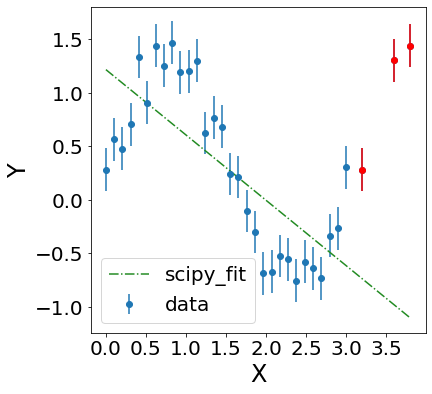

In [9]:
# make a wider model to see the real 'future' behavior
x3 = np.append(x, [3.2, 3.6, 3.8] )
y3 = np.sin(2*x3) + np.random.random(len(x3))*0.6

plt.figure( figsize = ( 6, 6 ) )

plt.errorbar( x3, y3, yerr = 0.2, marker = 'o', linestyle = 'none', label = 'data')
plt.plot( x3, t2[ 0 ] *x3 + t2 [ 1 ], linestyle = '-.', color = 'forestgreen', label ='scipy_fit')
plt.errorbar( [3.2, 3.6, 3.8] , y3[ len(x3)-3:  ], yerr = 0.2, marker = 'o', linestyle = 'none', color = 'red' )

plt.xticks( fontsize = 20 )
plt.yticks( fontsize = 20 )
plt.legend( fontsize = 20 )
plt.xlabel('X', fontsize = 24)
plt.ylabel('Y', fontsize = 24)

In [10]:
# expand its behavior up to x = 4
qq =  t2b[ 0 ] * x3 + t2b[ 1 ] * x3**2 + t2b[ 2 ]* x3**3 + \
     t2b[ 3 ] * x3**4  + t2b[ 4 ] * x3**5 +  t2b[ 5 ] * x3**6  +  t2b[ 6 ] * x3**7    


Text(0, 0.5, 'Y')

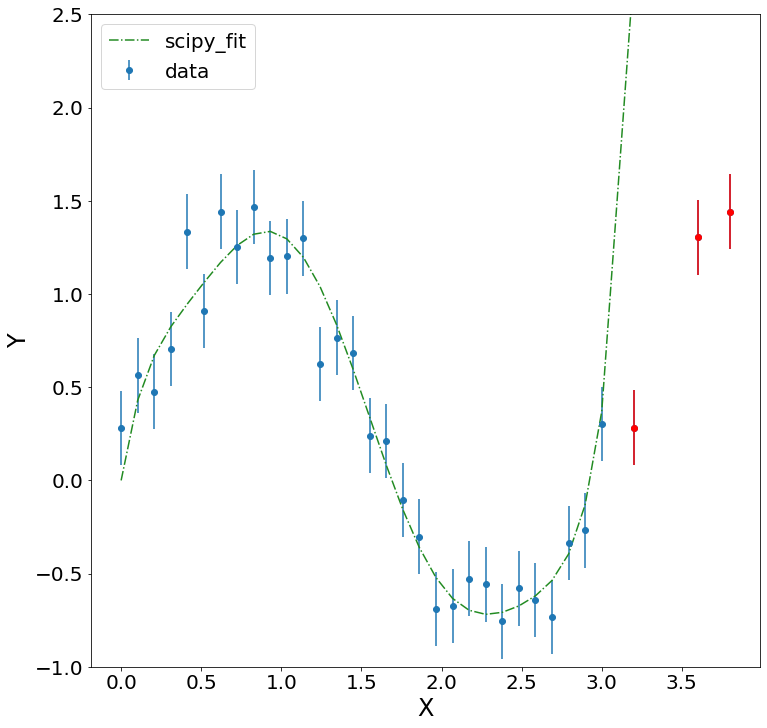

In [11]:
# make a wider model to see the real 'future' behavior and overplot the higher order polynomial:
plt.figure( figsize = ( 12, 12 ) )

plt.errorbar( x3, y3, yerr = 0.2, marker = 'o', linestyle = 'none', label = 'data')
plt.plot( x3, qq  , linestyle = '-.', color = 'forestgreen', label ='scipy_fit')
plt.errorbar( [3.2, 3.6, 3.8] , y3[ len(x3)-3:  ], yerr = 0.2, marker = 'o', linestyle = 'none', color = 'red' )

plt.xticks( fontsize = 20 )
plt.yticks( fontsize = 20 )
plt.legend( fontsize = 20 )
plt.ylim( -1., 2.5)
plt.xlabel('X', fontsize = 24)
plt.ylabel('Y', fontsize = 24)

Text(0, 0.5, 'Y')

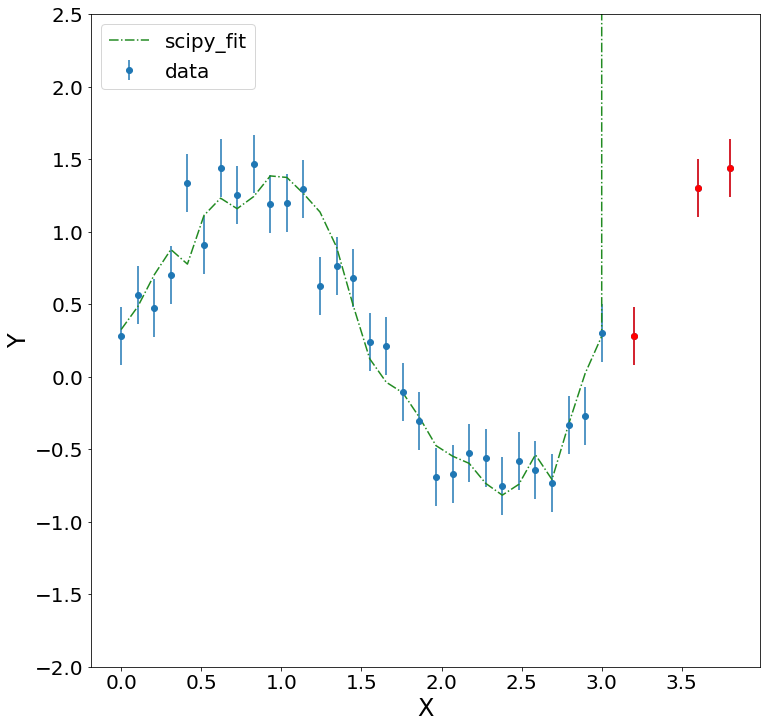

In [12]:
# go back to the 29th deg polynomial;
# make a wider model to see the real 'future' behavior and overplot the higher order polynomial:
plt.figure( figsize = ( 12, 12 ) )

plt.errorbar( x3, y3, yerr = 0.2, marker = 'o', linestyle = 'none', label = 'data')
plt.plot( x3, z(x3) , linestyle = '-.', color = 'forestgreen', label ='scipy_fit')
plt.errorbar( [3.2, 3.6, 3.8] , y3[ len(x3)-3:  ], yerr = 0.2, marker = 'o', linestyle = 'none', color = 'red' )

plt.xticks( fontsize = 20 )
plt.yticks( fontsize = 20 )
plt.legend( fontsize = 20 )
plt.ylim( -2., 2.5)
plt.xlabel('X', fontsize = 24)
plt.ylabel('Y', fontsize = 24)

### Your model underfits your data when the model doesn't fit well the data. The model is unable to capture the relationship between the input examples x and the target values y  --> you use a too simplified model to describe what actually happens

### Your model overfits your data when it fits them a bit 'too' well....your model is too complex for the few data points you have and it is memorizing all the data, including their noise, as model inputs...


### in ML (you can see the ML lecture in the demos/ML/ folder) you try to figure out if you under- or over-fit your data by minimizing your cost function; a measure of how close your predicted values f(x) are to the real observed y points (a form of cost function is e.g. chi-square minimization).

### Split data in training and validation/testing dataset --> train on one, test and validate on others

### If you underfit your training dataset in ML your fit will be poor even for your training dataset; if you overfit your fit will be good for the training dataset but will be bad for fitting your testing dataset

### What do you do if you find out you under or overfit your data? Multiple things could be the problem:
- not enough training data for your model
- not accurate enough model, or more often, too complex model 
- sometimes, especially when ML is at hand, maybe you just have not captured enough observations for *all* your parameters (same true for MCMC)


### There are some cases where your fit can be horrible, but more parameters in your model only increase your fit...

In [13]:
x2 = np.linspace(0, 6, 100)*np.pi
y2 = np.cos(x2 )

In [14]:
z2 = 1 - x2**2/np.math.factorial(2) + x2**4/np.math.factorial(4) 

z2b = 1 - x2**2/np.math.factorial(2) + x2**4/np.math.factorial(4) - x2**6/np.math.factorial(6) +\
     x2**8/np.math.factorial(8) 

z2c = 1 - x2**2/np.math.factorial(2) + x2**4/np.math.factorial(4) - x2**6/np.math.factorial(6) +\
     x2**8/np.math.factorial(8) - x2**10/np.math.factorial(10) + x2**12/np.math.factorial(12)

z2d = 1 - x2**2/np.math.factorial(2) + x2**4/np.math.factorial(4) - x2**6/np.math.factorial(6) +\
     x2**8/np.math.factorial(8) - x2**10/np.math.factorial(10) + x2**12/np.math.factorial(12) - \
     x2**14/np.math.factorial(14) + x2**16/np.math.factorial(16) - x2**18/np.math.factorial(18)

(-2.0, 2.0)

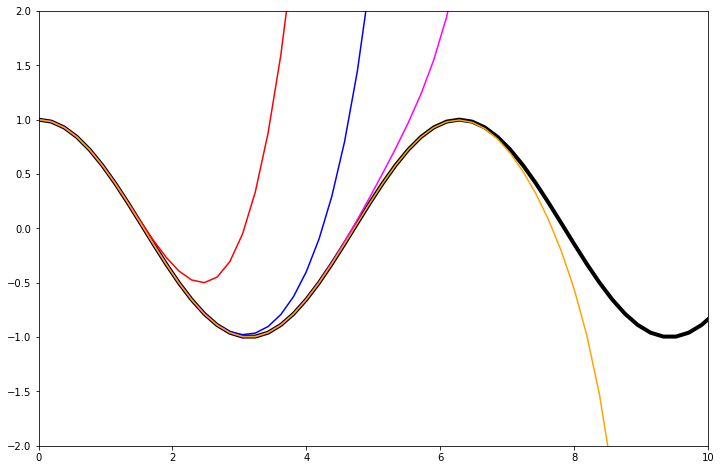

In [15]:
plt.figure( figsize = ( 12, 8 ) )
plt.plot(x2, y2,   color = 'black', linewidth = 4)
plt.plot( x2, z2,  color = 'red')
plt.plot( x2, z2b, color = 'blue')
plt.plot( x2, z2c, color = 'magenta')
plt.plot( x2, z2d, color = 'orange')

plt.xlim(0,10)
plt.ylim( -2,2)

In [16]:
import math

def func_cos(x, n):
    cos_approx = 0
    for i in range(n):
        coef = (-1)**i
        num = x**(2*i)
        denom = math.factorial(2*i)
        cos_approx += ( coef ) * ( (num)/(denom) )
    
    return cos_approx

In [17]:
angle_rad = (math.radians(145))
out = func_cos(angle_rad,5)
print(out, np.cos(angle_rad))

-0.8163216376797149 -0.8191520442889919


### 1. We have numpy arrays: 
x = np.array([0.25,0.5,0.75,1.,1.25,1.5,1.75,2.,2.25,2.5, 2.75,3.,3.25,3.5,3.75,4.0,4.25,4.5,4.75,5.0,5.25] )

y = np.array( [ 2.707, 14.667, 7.33, 13.907, 19.583, 28.559, 27.019, 32.177, 59.223, 61.353, 97.764,  
               95.65, 118.218, 149.653, 160.158, 195.923, 209.151,276.037, 296.779, 321.571, 400.611 ] )


### and error bars: 

sigma = np.array( [46.654, 80.431, 86.407, 60.667, 89.522, 120.837, 54.983, 72.334, 93.261,
                   14.128, 127.621, 121.674, 76.334, 93.644,137.65, 54.396, 51.924, 60.282,
                   109.396,125.367, 142.854] )*0.24


###  Try to fit the data with a:
- linear function $a*x+b$  (use curvefit)
- second order polynomial: $a*x^2+b*x +c$ (use curvefit)
- third order polynomial: $a*x^3 + b*x^2+c*x +d$ (use curvefit)
- sixth order polynomial: $a*x^6 + ...+f*x +g$ (use polyfit)
- tenth order polynomial: $a*x^{10} +...+ e*x+ f$ (use polyfit)
- fifteenth order polynomial: $a*x^{15} +...+ n*x+ o$ (use polyfit)


### Which models do you think underfit your data? Which one seem to overfit?

In [12]:
x = np.array([0.25,0.5,0.75,1.,1.25,1.5,1.75,2.,2.25,2.5, 2.75,3.,3.25,3.5,3.75,4.0,4.25,4.5,4.75,5.0,5.25] )

y = np.array( [ 2.707, 14.667, 7.33, 13.907, 19.583, 28.559, 27.019, 32.177, 59.223, 61.353, 97.764,
95.65, 118.218, 149.653, 160.158, 195.923, 209.151,276.037, 296.779, 321.571, 400.611 ] )

sigma = np.array( [46.654, 80.431, 86.407, 60.667, 89.522, 120.837, 54.983, 72.334, 93.261, 14.128, 127.621, 
                   121.674, 76.334, 93.644,137.65, 54.396, 51.924, 60.282, 109.396,125.367, 142.854] )*0.24

<ErrorbarContainer object of 3 artists>

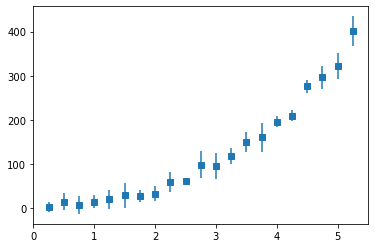

In [13]:
#try plotting:
plt.errorbar( x,y, yerr = sigma, linestyle ='none', marker = 's')

In [18]:
# linear function  𝑎∗𝑥+𝑏  (use curvefit)

def my_fit_function(x, a, b):
    """fit your data with a straight line"""
    #y = a*t+b
    return b + a* x 


# call curve_fit
t2, v2 = curve_fit(my_fit_function, x , y, sigma = sigma)

print( t2 )


[ 63.21466456 -77.27095244]


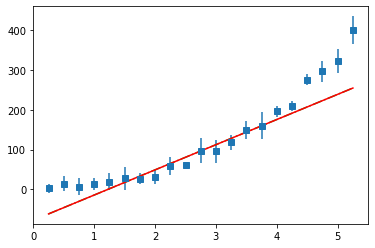

In [19]:
#is it a good solution?
plt.errorbar( x,y, yerr = sigma, linestyle ='none', marker = 's')
plt.plot( x, my_fit_function(x, *t2), linestyle = '-.', color = 'forestgreen',label ='linear_fit')
plt.plot( x , t2[0]*x+t2[1] , color = 'red')

1.0 1.0 1.0
1.0 1.0 1.0
1.0 1.0 1.0
1.0000000149011612 1.0 1.0
1.0 1.0000000149011612 1.0
1.0 1.0 1.0000000149011612
17.843186359213263 -26.099356053876928 15.675630432175799
17.84318662509746 -26.099356053876928 15.675630432175799
17.843186359213263 -26.099355664966218 15.675630432175799
17.843186359213263 -26.099356053876928 15.675630665760895
17.84318724311774 -26.09936124628596 15.675640000260726
17.84318724311774 -26.09936124628596 15.675640000260726


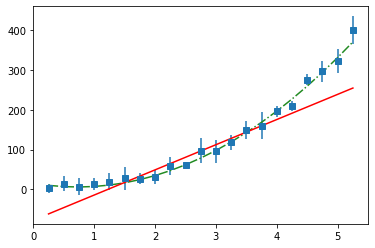

In [29]:
#second order polynomial:  𝑎∗𝑥2+𝑏∗𝑥+𝑐  (use curvefit)

def my_fit_function2(x, a, b, c):
    """fit your data with a straight line"""
    #y = a*t+b
    print( a, b, c )
    return  c + b* x + a* x**2


# call curve_fit
t3, v3 = curve_fit(my_fit_function2, x , y, sigma = sigma)


plt.errorbar( x,y, yerr = sigma, linestyle ='none', marker = 's')
plt.plot( x, my_fit_function2(x, *t3), linestyle = '-.', color = 'forestgreen',label ='linear_fit')
plt.plot( x , t2[0]*x+t2[1] , color = 'red')

In [22]:
t3

array([ 63.21466456, -77.27095244])

In [4]:
#third order polynomial:  𝑎∗𝑥3+𝑏∗𝑥2+𝑐∗𝑥+𝑑  (use curvefit)



In [ ]:
#is this a good solution
plt.errorbar( x, y, yerr = sigma, linestyle = 'none', marker = 's')
plt.plot( x , 1.88 * x**3+ 3.7*x**2+1.97*x +4.39, color = 'red')

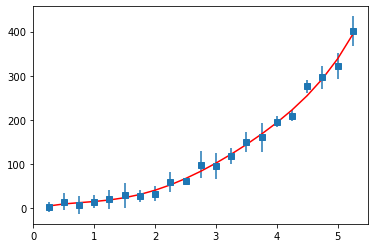

In [24]:
# sixth order polynomial: $a*x^6 + ...+f*x +g$ (use polyfit)
zn = np.polyfit( x, y , 6)
z = np.poly1d( zn )


plt.errorbar( x, y, yerr = sigma, linestyle = 'none', marker = 's')
plt.plot( x, z(x) , color = 'red')

In [ ]:
# tenth order polynomial: $a*x^{10} +...+ e*x+ f$ (use polyfit)

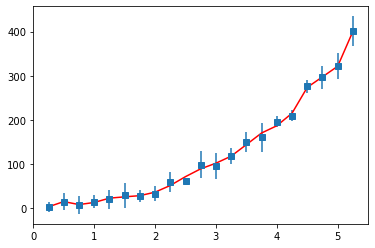

In [25]:
#fifteenth order polynomial: $a*x^{15} +...+ n*x+ o$ (use polyfit)
zn = np.polyfit( x, y , 15)
z = np.poly1d( zn )


plt.errorbar( x, y, yerr = sigma, linestyle = 'none', marker = 's')
plt.plot( x, z(x) , color = 'red')

### 1. It's the year 1700 and Ohm hasn't come up with his law yet. In your lab you measured the following data:
- Volt =  [  14.0, 142.0 , 34.3, 55.6, 24.2, 84.0, 48.6, 101.2, 154.6, 63.2] 
- Curr =  [0.333, 3.381, 0.809, 1.309, 0.576, 2.000, 1.157, 2.409, 3.681, 1.504 ]
- Volt_err = 2.2
- Curr_err = 0.132

### Plot your data using an error plot. What is the form that the best-fit model that fits your data should have?
### Use Curvefit to find the best-fit resistance of your circuit. Use leastsq to do the same.


In [26]:
Volt = np.array( [ 14.0, 142.0 , 34.3, 55.6, 24.2, 84.0, 48.6, 101.2, 154.6, 63.2] )
Curr = np.array( [0.333, 3.381, 0.809, 1.309, 0.576, 2.000, 1.157, 2.409, 3.681, 1.504 ] )
Volt_err = 2.2* np.ones( len( Volt ) )
Curr_err = 0.132 * np.ones( len( Curr ) )

<ErrorbarContainer object of 3 artists>

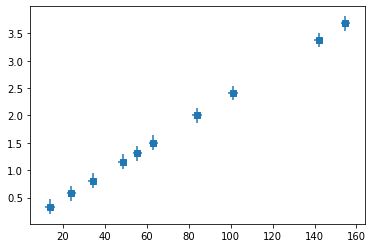

In [27]:
plt.errorbar( Volt, Curr, xerr = Volt_err, yerr = Curr_err, linestyle = 'none', marker = 's'  )

In [28]:
# use curvefit:



[ 0.02383691 -0.00441004]


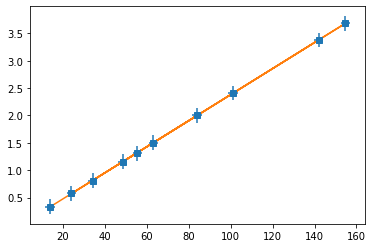

In [42]:
#use linfit:
from scipy.optimize import leastsq

### Review Practice

### 2. The leap years: Write a function leap_year( t ) that takes as input a year and prints out information on whether it is a leap year or not. 

- Remember that to be a leap year, the year number must be divisible by four – except for end-of-century years, which must be divisible by 400. So you need to test the following: 
- any year that is divisible by 400 is a leap year.
- Of the remaining years, any year that is divisible by 100 is not a leap year.
- Of the remaining years, any year that is divisible by 4 is a leap year.


### Test the code out for 1980, 1986, 2000 and 1900

### 3. How many days to the end of the month? Now that you know how to define a leap year make a function that when given a date (day, name of month and year) it will print an informative statement about how many days there are left in the month (so in January 15 2021 it will tell you there are 16 days left, in March 29 2022 it will tell you there are 2 days left etc). Make sure to take into account leap years! 

### Test the code out for: 12 January 2020, 2 November 2021, 2 February 2020 and 2 February 2021

### 4. Write a function that gets as input an ordered numpy array and a number and adds the number in the correct location in the ordered array. Do the same thing, but now with a list. Your functions should NOT use build in functions like sort(), sorted(), np.sort() etc

### Test it for array ar1 = np.array( [ 1, 5, 12, 88, 124, 232 ] ) and number n1 = 42 and for lists ar2 = [ 1, 4, 22, 38, 44, 52 ] and n2 = 8

### 7. Make a code that asks the user for a filename. Then it checks if a file exists. If so, it let's you know that the file exists. If not it asks the user if they want to make the file (Y/N) and proceeds to do so if the answer is Y.

### You can also make the code tell you when the file was created if it is already there.